In [14]:
# Authors:- Tanmay Sawaji(tsawaji) and Ruchik Dama(rdama)

In [15]:
from torch.autograd import Variable
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

In [16]:
train_ds = dsets.MNIST(root='MNIST_data/',train=True,transform=transforms.ToTensor(),download=True)
test = dsets.MNIST(root='MNIST_data/',train=False,transform=transforms.ToTensor(),download=True)
#Creating a validations set which is 10% of the Train Set
indices = np.arange(60000)
validate  = torch.utils.data.Subset(train_ds, indices[:6000])
train=torch.utils.data.Subset(train_ds, indices[6000:])

In [17]:
batch_size = 32

In [18]:
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = True)
validation_loader = torch.utils.data.DataLoader(validate, batch_size=batch_size, shuffle=True)

In [19]:
print('The training dataset:\t',train)
print('\nThe testing dataset:\t',test)
print('\nThe validate dataset:\t',validate)

The training dataset:	 <torch.utils.data.dataset.Subset object at 0x7f22b847b5d0>

The testing dataset:	 Dataset MNIST
    Number of datapoints: 10000
    Root location: MNIST_data/
    Split: Test
    StandardTransform
Transform: ToTensor()

The validate dataset:	 <torch.utils.data.dataset.Subset object at 0x7f22afb5f350>


In [20]:
train_loader

In [21]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


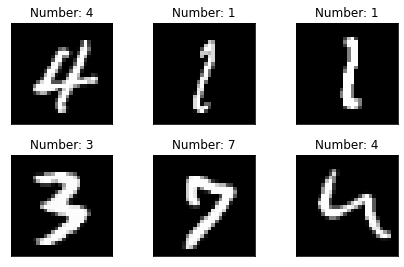

In [22]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(images[i].numpy().squeeze(), cmap='gray', interpolation='none')
  plt.title("Number: {}".format(labels[i]))
  plt.xticks([])
  plt.yticks([])
#fig

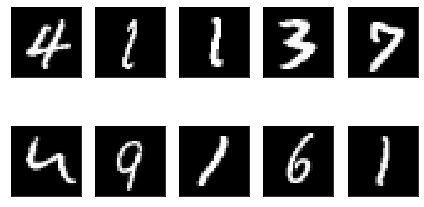

In [23]:
fig,ax=plt.subplots(2,5,True,True)
ax=ax.flatten()
for i in range(10):
  ax[i].imshow(images[i].numpy().squeeze(), cmap='gray', interpolation='none')

    
    
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [24]:
class CNN(torch.nn.Module):
    def __init__(self):
            super(CNN, self).__init__()

            self.layer=torch.nn.Sequential(
            # outputOfEachConvLayer = [(in_channel + 2*padding - kernel_size) / stride] + 1
            torch.nn.Conv2d(1, 12, kernel_size=3, stride=1, padding=1),
            #Batch Normalization
            torch.nn.BatchNorm2d(12),
            #torch.nn.init.xavier_normal_(self.conv1.weight),
            #torch.nn.init.zeros_(self.torch.nn.Conv2d.bias),
            torch.nn.ReLU(inplace=True),
                
            #In First Layer the output would be (for first layer the we take in-channel as 28 beacause the images is 28x28 pixel)
            # so, [(28 + 2*1 - 3)/1] + 1 = 28.
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            # as kernel_size in maxpool is 2 ,  we have to divide it by 2 28/2=14.
            #Second Layer
            torch.nn.Conv2d(12, 24, kernel_size=3, stride=1, padding=1),
            #Batch Normalization
            torch.nn.BatchNorm2d(24),
            #torch.nn.init.xavier_normal_(self.torch.nn.Conv2d.weight),
            #torch.nn.init.zeros_(self.torch.nn.Conv2d.bias),
            # After the second convolutional layer the output of this layer is:
            # [(14 + 2*1 - 3)/1] + 1 = 14.
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            # Since we applied maxpooling with kernel_size=2 we have to divide by 2, so we get
            # 14 / 2 = 7
            
            )
    
            
            # Linear layer
            self.linear_layers = torch.nn.Sequential(
                    # We have the output_channel=24 of our second conv layer, and 7*7 is derived by the formula 
                    # which is the output of each convolutional layer
                    torch.nn.Linear(in_features=24*7*7, out_features=64),          
                    torch.nn.ReLU(),
                    #torch.nn.Dropout(p=0.25),
                    torch.nn.Linear(64, 10), 
                    #torch.nn.init.xavier_normal_(self.torch.nn.Linear.weight),
                    #torch.nn.init.zeros_(self.torch.nn.Linear.bias),
            )
    
    # Defining forward
    def forward(self, x):
        x = self.layer(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x
#Glorot Initialization    
def initialize_weights(m):
      if isinstance(m, torch.nn.Conv2d):
          torch.nn.init.xavier_normal_(m.weight)
          if m.bias is not None:
             torch.nn.init.zeros_(m.bias) 
      elif isinstance(m, torch.nn.Linear):
          torch.nn.init.xavier_normal_(m.weight)
          torch.nn.init.zeros_(m.bias)


# instantiate CNN model
model = CNN()
model.apply(initialize_weights)
print(model)

CNN(
  (layer): Sequential(
    (0): Conv2d(1, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=1176, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=10, bias=True)
  )
)


In [25]:
learning_rate = 0.05
criterion = torch.nn.CrossEntropyLoss()    # Softmax is internally computed.
optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate,momentum=0.9)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

In [26]:
for param in model.parameters():
    print(param.size())

torch.Size([12, 1, 3, 3])
torch.Size([12])
torch.Size([12])
torch.Size([12])
torch.Size([24, 12, 3, 3])
torch.Size([24])
torch.Size([24])
torch.Size([24])
torch.Size([64, 1176])
torch.Size([64])
torch.Size([10, 64])
torch.Size([10])


Training the Deep Learning network ...
total_batch  1687
Size of the testing dataset  torch.Size([10000, 28, 28])
Batch size is :  32
Total number of batches is :  1687
Total number of epochs is : 50
Epoch=  1 , batch =  0 , cost =  2.7854952812194824 , accuracy =  0.0625
Epoch=  1 , batch =  625 , cost =  0.012613020837306976 , accuracy =  1.0
Epoch=  1 , batch =  1250 , cost =  0.0038305562920868397 , accuracy =  1.0
Validate Epoch=  1 , batch =  0 , cost =  0.012302126735448837 , accuracy =  1.0
Epoch:  1  averaged cost =  0.17098230123519897  train accuracy =  0.9468490817535545


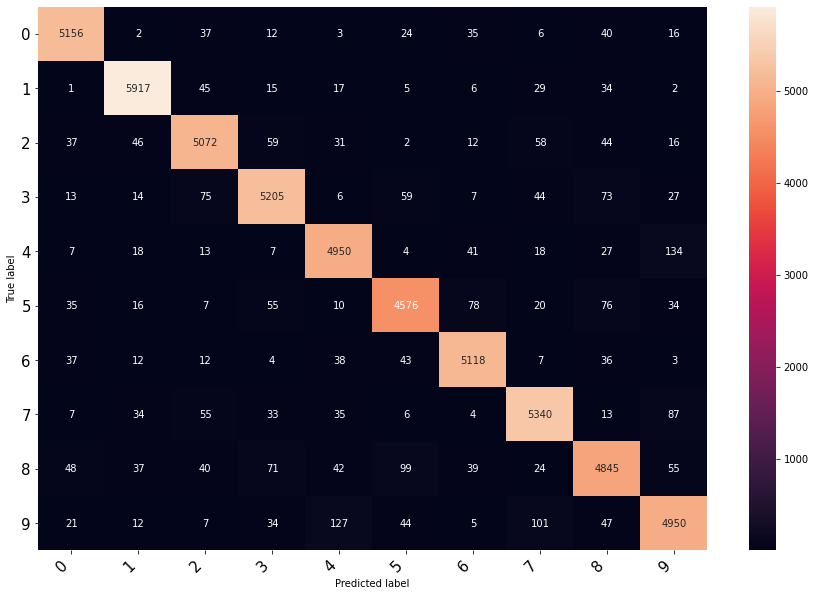

Epoch=  2 , batch =  0 , cost =  0.12016729265451431 , accuracy =  0.9375
Epoch=  2 , batch =  625 , cost =  0.06303557753562927 , accuracy =  0.96875
Epoch=  2 , batch =  1250 , cost =  0.3291970491409302 , accuracy =  0.9375
Validate Epoch=  2 , batch =  0 , cost =  0.051531653851270676 , accuracy =  0.96875
Epoch:  2  averaged cost =  0.0791693776845932  train accuracy =  0.9616872778436019


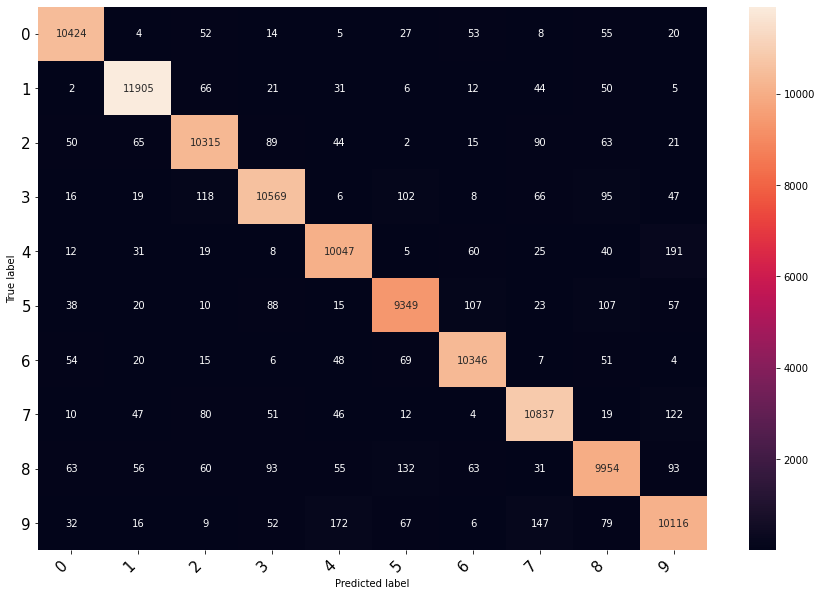

Epoch=  3 , batch =  0 , cost =  0.07921116054058075 , accuracy =  0.9375
Epoch=  3 , batch =  625 , cost =  0.051433417946100235 , accuracy =  0.96875
Epoch=  3 , batch =  1250 , cost =  0.11375053226947784 , accuracy =  0.96875
Validate Epoch=  3 , batch =  0 , cost =  0.2888275384902954 , accuracy =  1.0
Epoch:  3  averaged cost =  0.0590624064207077  train accuracy =  0.9683673973143759


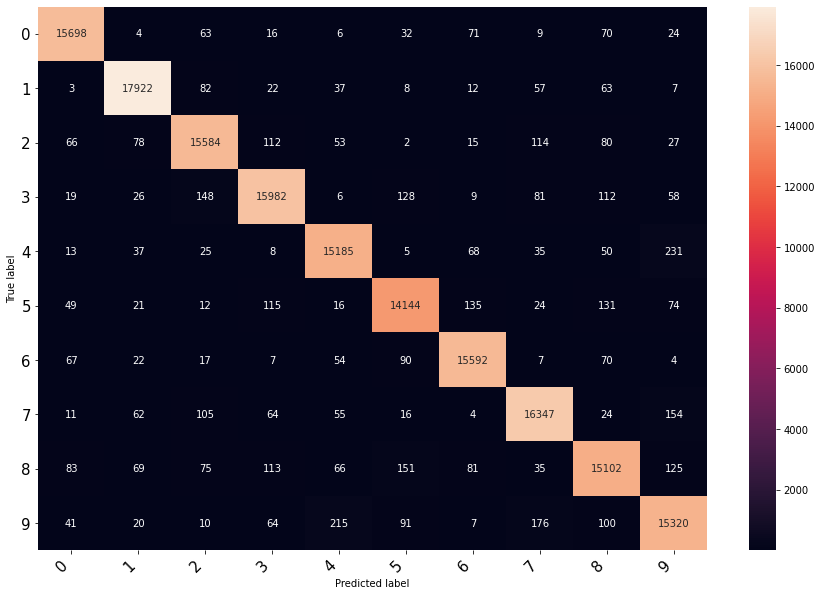

Epoch=  4 , batch =  0 , cost =  0.008959393948316574 , accuracy =  1.0
Epoch=  4 , batch =  625 , cost =  0.014586330391466618 , accuracy =  1.0
Epoch=  4 , batch =  1250 , cost =  0.054046086966991425 , accuracy =  0.9375
Validate Epoch=  4 , batch =  0 , cost =  0.0017800017958506942 , accuracy =  1.0
Epoch:  4  averaged cost =  0.052413828670978546  train accuracy =  0.9722119372037915


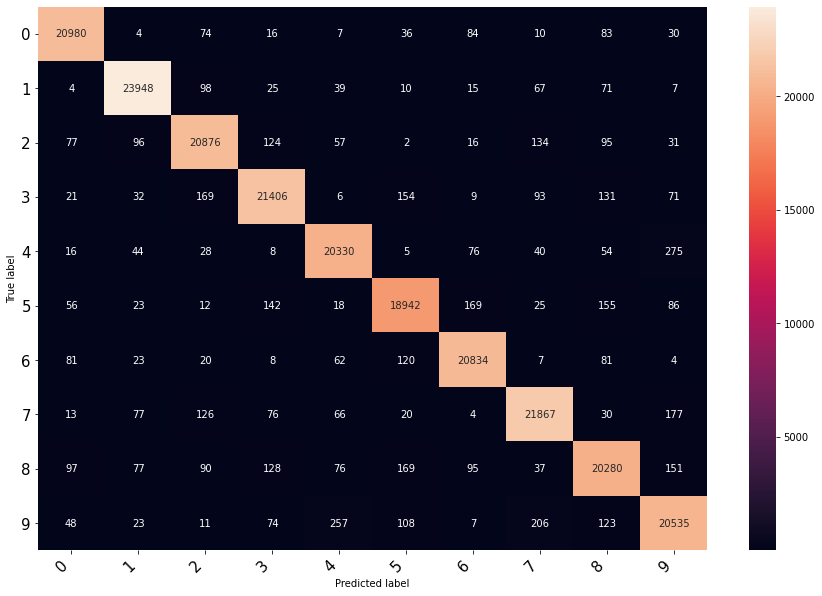

Epoch=  5 , batch =  0 , cost =  0.05275799334049225 , accuracy =  0.96875
Epoch=  5 , batch =  625 , cost =  0.0004753952962346375 , accuracy =  1.0
Epoch=  5 , batch =  1250 , cost =  0.12198208272457123 , accuracy =  0.96875
Validate Epoch=  5 , batch =  0 , cost =  0.0031017132569104433 , accuracy =  1.0
Epoch:  5  averaged cost =  0.04654937982559204  train accuracy =  0.9749814869668246


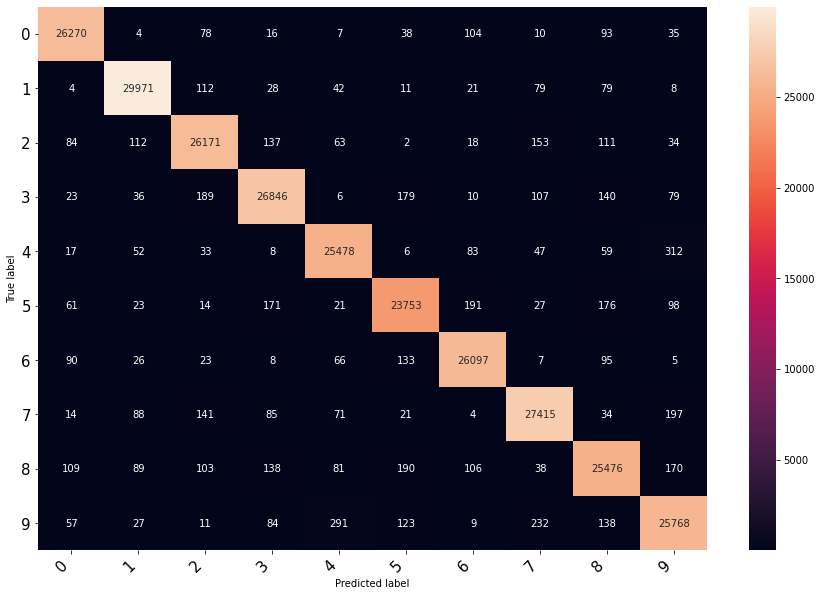

Epoch=  6 , batch =  0 , cost =  0.08848479390144348 , accuracy =  0.96875
Epoch=  6 , batch =  625 , cost =  0.12446250766515732 , accuracy =  0.9375
Epoch=  6 , batch =  1250 , cost =  0.0034623013343662024 , accuracy =  1.0
Validate Epoch=  6 , batch =  0 , cost =  0.0017951796762645245 , accuracy =  0.96875
Epoch:  6  averaged cost =  0.041085049510002136  train accuracy =  0.9770932069510269


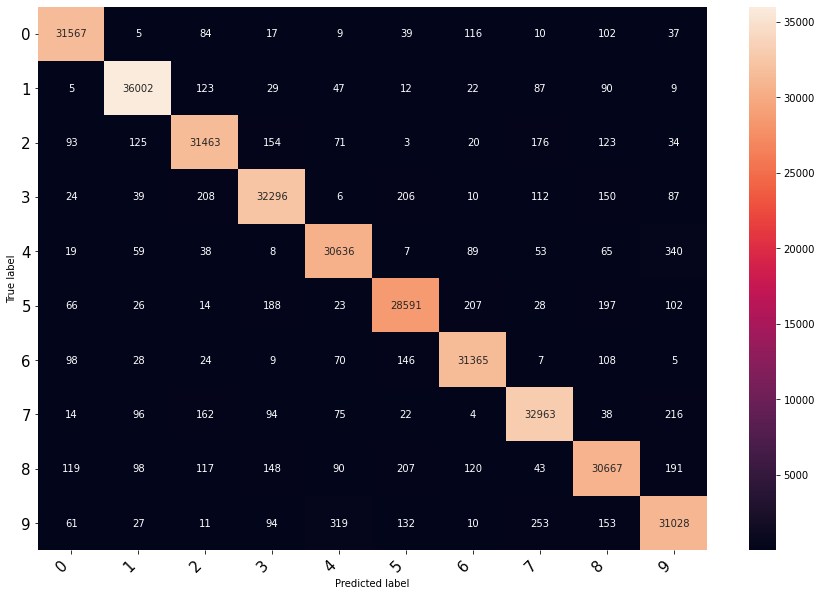

Epoch=  7 , batch =  0 , cost =  0.1437591314315796 , accuracy =  0.9375
Epoch=  7 , batch =  625 , cost =  0.026412544772028923 , accuracy =  1.0
Epoch=  7 , batch =  1250 , cost =  0.00415560370311141 , accuracy =  1.0
Validate Epoch=  7 , batch =  0 , cost =  0.16263803839683533 , accuracy =  0.96875
Epoch:  7  averaged cost =  0.03794240951538086  train accuracy =  0.9786676963439405


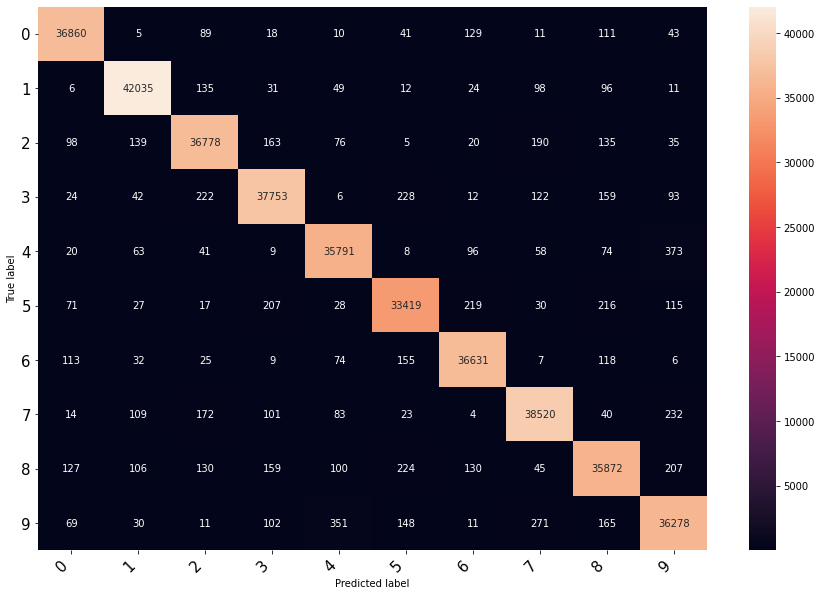

Epoch=  8 , batch =  0 , cost =  0.0011409291764721274 , accuracy =  1.0
Epoch=  8 , batch =  625 , cost =  0.006199069321155548 , accuracy =  1.0
Epoch=  8 , batch =  1250 , cost =  0.021513864398002625 , accuracy =  1.0
Validate Epoch=  8 , batch =  0 , cost =  0.0077856783755123615 , accuracy =  0.875
Epoch:  8  averaged cost =  0.03649815171957016  train accuracy =  0.980008238299763


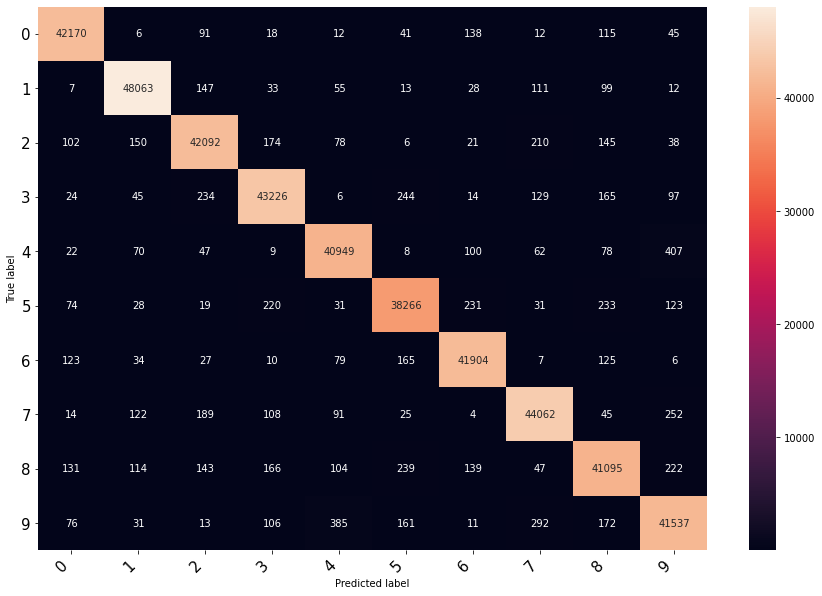

Epoch=  9 , batch =  0 , cost =  6.140814366517588e-05 , accuracy =  1.0
Epoch=  9 , batch =  625 , cost =  0.1537836194038391 , accuracy =  0.9375
Epoch=  9 , batch =  1250 , cost =  6.215705070644617e-05 , accuracy =  1.0
Validate Epoch=  9 , batch =  0 , cost =  0.0016159368678927422 , accuracy =  1.0
Epoch:  9  averaged cost =  0.03673126921057701  train accuracy =  0.9810364830173776


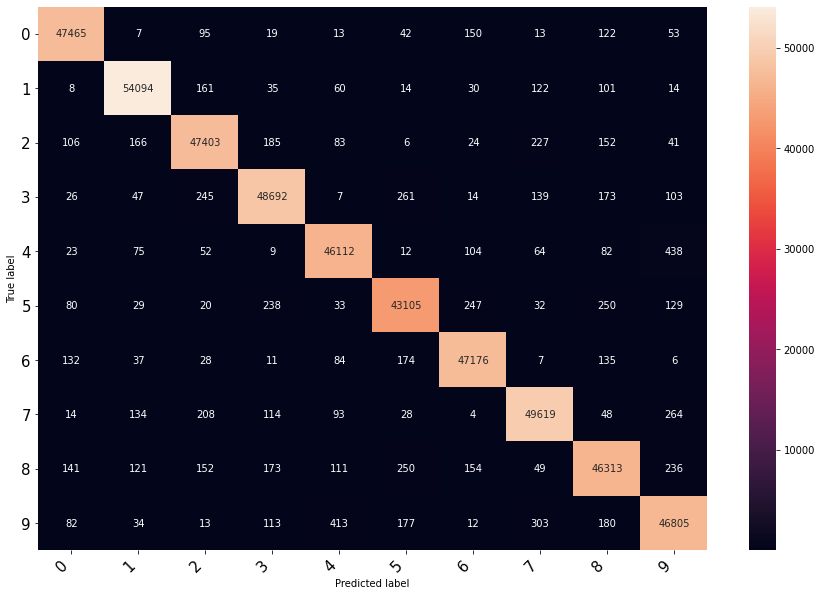

Epoch=  10 , batch =  0 , cost =  0.015621115453541279 , accuracy =  1.0
Epoch=  10 , batch =  625 , cost =  0.015805134549736977 , accuracy =  1.0
Epoch=  10 , batch =  1250 , cost =  0.0233493410050869 , accuracy =  1.0
Validate Epoch=  10 , batch =  0 , cost =  0.022917620837688446 , accuracy =  1.0
Epoch:  10  averaged cost =  0.033539120107889175  train accuracy =  0.9818961048578199


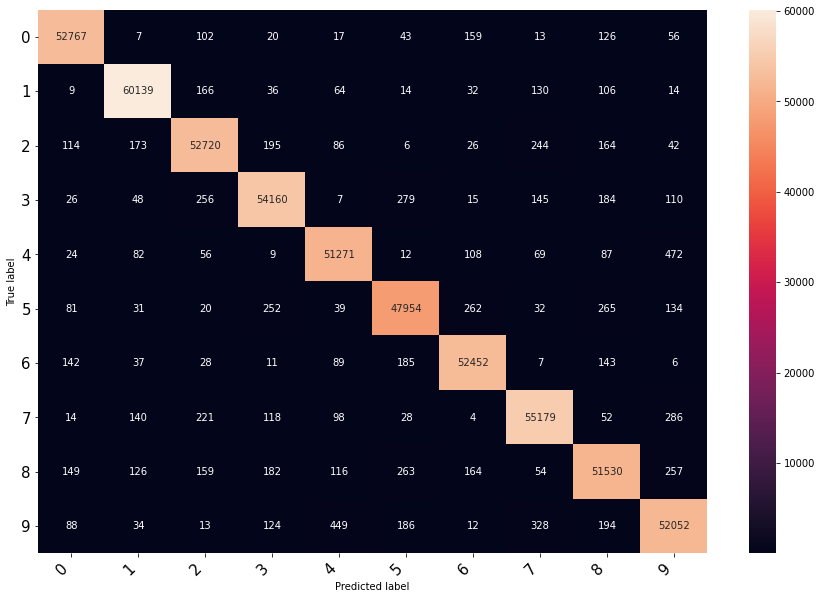

Epoch=  11 , batch =  0 , cost =  0.0612596794962883 , accuracy =  0.96875
Epoch=  11 , batch =  625 , cost =  0.0030512367375195026 , accuracy =  1.0
Epoch=  11 , batch =  1250 , cost =  0.0006924793124198914 , accuracy =  1.0
Validate Epoch=  11 , batch =  0 , cost =  0.00011579815327422693 , accuracy =  0.96875
Epoch:  11  averaged cost =  0.012960241176187992  train accuracy =  0.9831867998707454


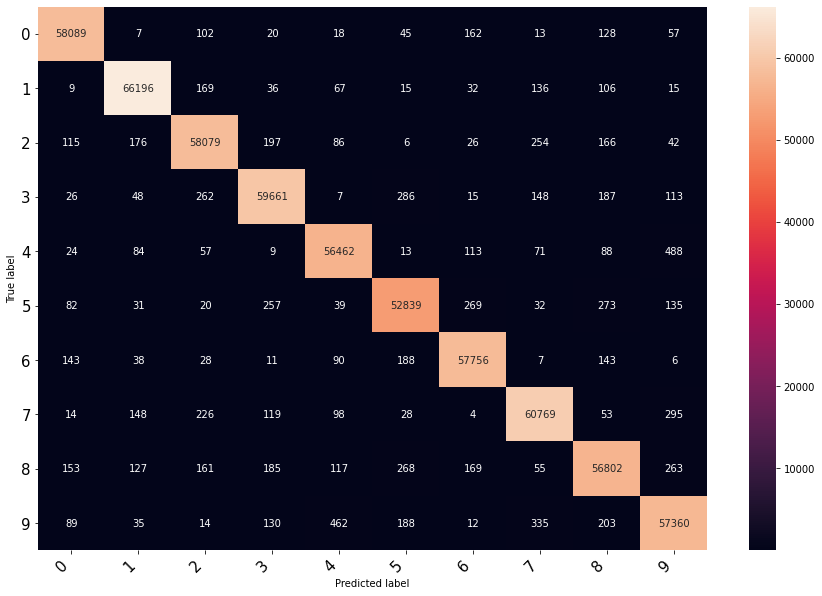

Epoch=  12 , batch =  0 , cost =  1.7322541907560662e-06 , accuracy =  1.0
Epoch=  12 , batch =  625 , cost =  0.0015915310941636562 , accuracy =  1.0
Epoch=  12 , batch =  1250 , cost =  4.577178697218187e-05 , accuracy =  1.0
Validate Epoch=  12 , batch =  0 , cost =  5.7815509535430465e-06 , accuracy =  0.96875
Epoch:  12  averaged cost =  0.008676796220242977  train accuracy =  0.9843842565165877


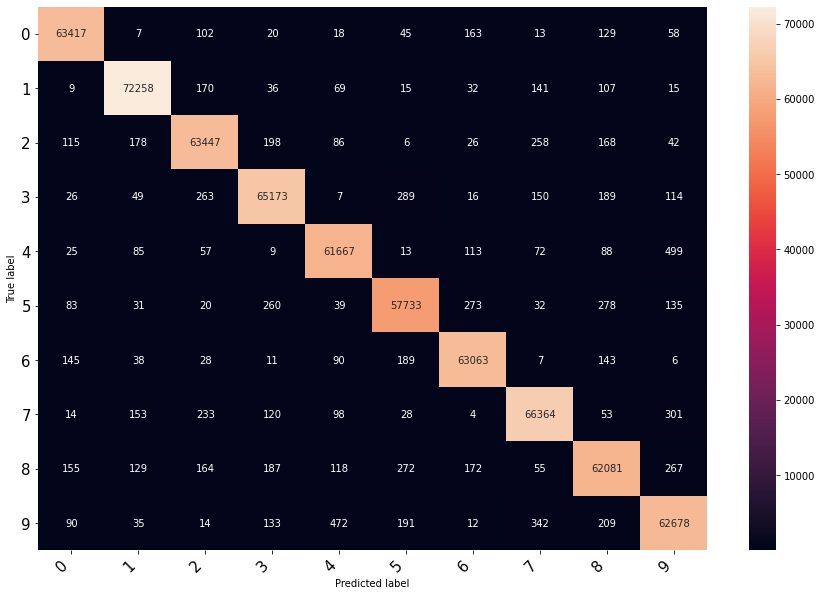

Epoch=  13 , batch =  0 , cost =  0.014041188172996044 , accuracy =  1.0
Epoch=  13 , batch =  625 , cost =  0.006406334228813648 , accuracy =  1.0
Epoch=  13 , batch =  1250 , cost =  0.0002852190227713436 , accuracy =  1.0
Validate Epoch=  13 , batch =  0 , cost =  0.0006924268091097474 , accuracy =  0.96875
Epoch:  13  averaged cost =  0.0073463390581309795  train accuracy =  0.9854416355267955


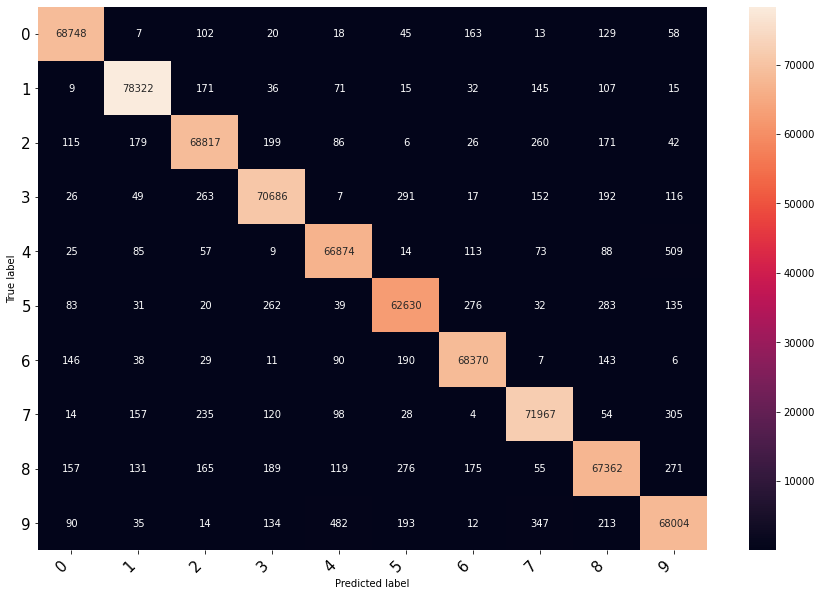

Epoch=  14 , batch =  0 , cost =  0.00023733188572805375 , accuracy =  1.0
Epoch=  14 , batch =  625 , cost =  0.005778507329523563 , accuracy =  1.0
Epoch=  14 , batch =  1250 , cost =  0.0026335776783525944 , accuracy =  1.0
Validate Epoch=  14 , batch =  0 , cost =  7.446039671776816e-05 , accuracy =  1.0
Epoch:  14  averaged cost =  0.006507648155093193  train accuracy =  0.9863585392687881


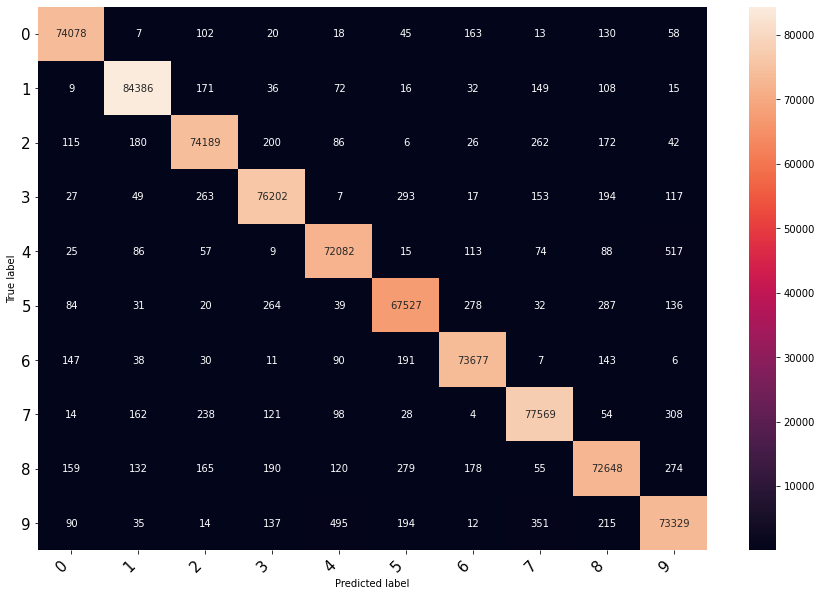

Epoch=  15 , batch =  0 , cost =  0.0012915984261780977 , accuracy =  1.0
Epoch=  15 , batch =  625 , cost =  0.00019173102919012308 , accuracy =  1.0
Epoch=  15 , batch =  1250 , cost =  0.0017908710287883878 , accuracy =  1.0
Validate Epoch=  15 , batch =  0 , cost =  0.0008398263598792255 , accuracy =  1.0
Epoch:  15  averaged cost =  0.0058465744368731976  train accuracy =  0.9871618285939968


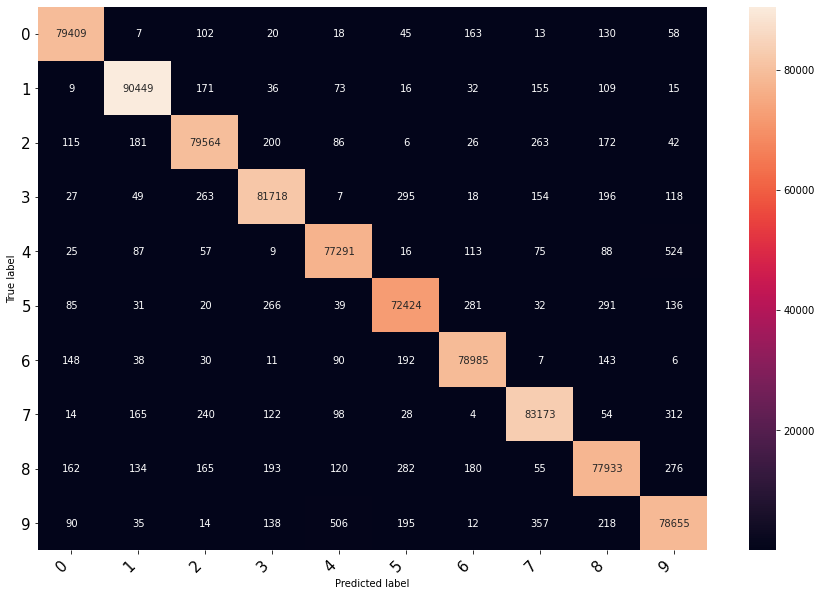

Epoch=  16 , batch =  0 , cost =  9.681662049842998e-06 , accuracy =  1.0
Epoch=  16 , batch =  625 , cost =  0.00019965023966506124 , accuracy =  1.0
Epoch=  16 , batch =  1250 , cost =  7.221822306746617e-05 , accuracy =  1.0
Validate Epoch=  16 , batch =  0 , cost =  0.00042132969247177243 , accuracy =  1.0
Epoch:  16  averaged cost =  0.005292337853461504  train accuracy =  0.9878866909804502


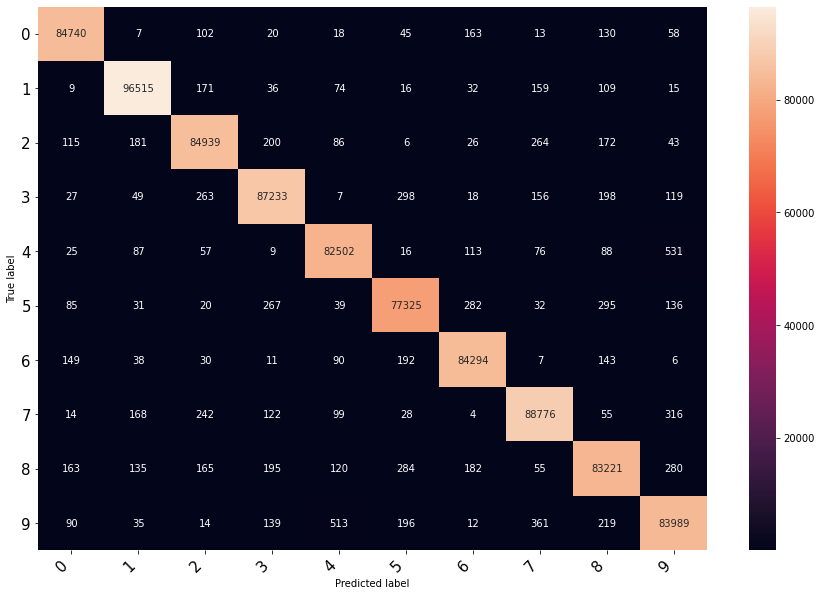

Epoch=  17 , batch =  0 , cost =  2.3719025193713605e-05 , accuracy =  1.0
Epoch=  17 , batch =  625 , cost =  0.0038716685958206654 , accuracy =  1.0
Epoch=  17 , batch =  1250 , cost =  0.0029822825454175472 , accuracy =  1.0
Validate Epoch=  17 , batch =  0 , cost =  4.07116167480126e-05 , accuracy =  0.9375
Epoch:  17  averaged cost =  0.0049834116362035275  train accuracy =  0.9885328094507946


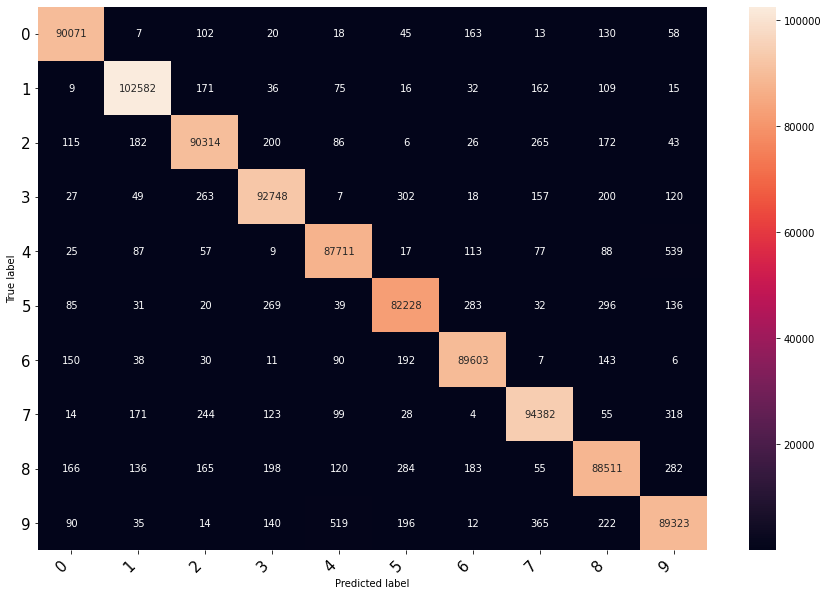

Epoch=  18 , batch =  0 , cost =  7.487510174541967e-06 , accuracy =  1.0
Epoch=  18 , batch =  625 , cost =  2.4776149075478315e-05 , accuracy =  1.0
Epoch=  18 , batch =  1250 , cost =  9.997767847380601e-06 , accuracy =  1.0
Validate Epoch=  18 , batch =  0 , cost =  2.4708782802917995e-05 , accuracy =  1.0
Epoch:  18  averaged cost =  0.00447455421090126  train accuracy =  0.989114336492891


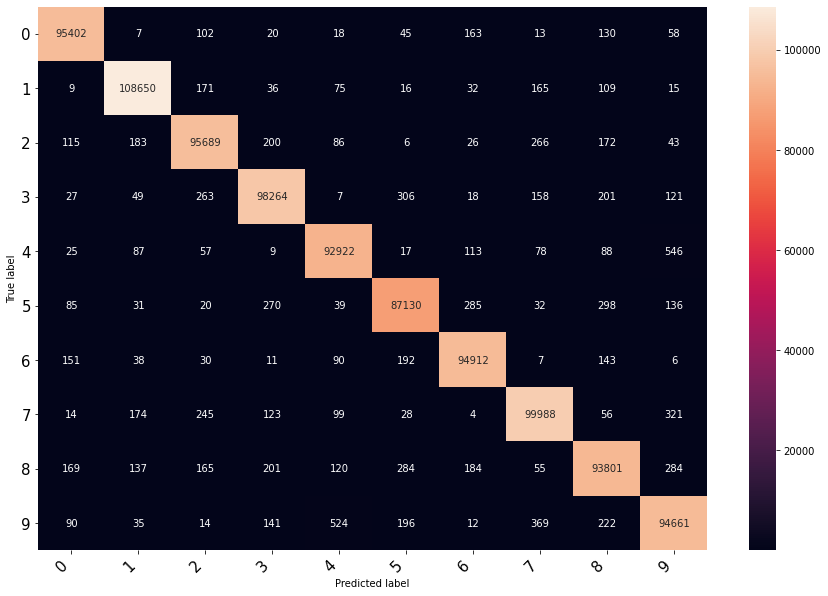

Epoch=  19 , batch =  0 , cost =  0.010675773955881596 , accuracy =  1.0
Epoch=  19 , batch =  625 , cost =  6.781423144275323e-05 , accuracy =  1.0
Epoch=  19 , batch =  1250 , cost =  0.0004382745537441224 , accuracy =  1.0
Validate Epoch=  19 , batch =  0 , cost =  0.00024633490829728544 , accuracy =  1.0
Epoch:  19  averaged cost =  0.0041191731579601765  train accuracy =  0.9896356245323024


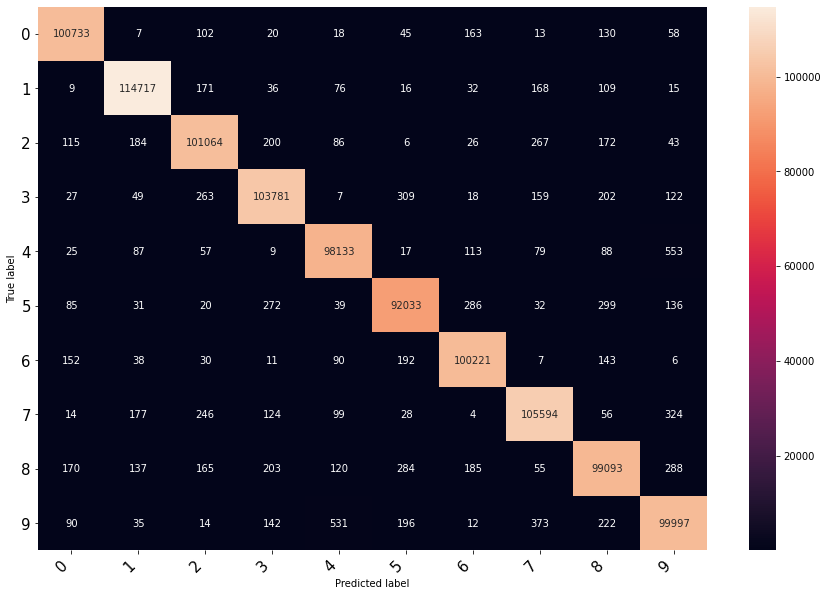

Epoch=  20 , batch =  0 , cost =  0.00018107295909430832 , accuracy =  1.0
Epoch=  20 , batch =  625 , cost =  0.004554040264338255 , accuracy =  1.0
Epoch=  20 , batch =  1250 , cost =  0.0003352365456521511 , accuracy =  1.0
Validate Epoch=  20 , batch =  0 , cost =  0.00010190094326389953 , accuracy =  1.0
Epoch:  20  averaged cost =  0.0038446523249149323  train accuracy =  0.9901140402843602


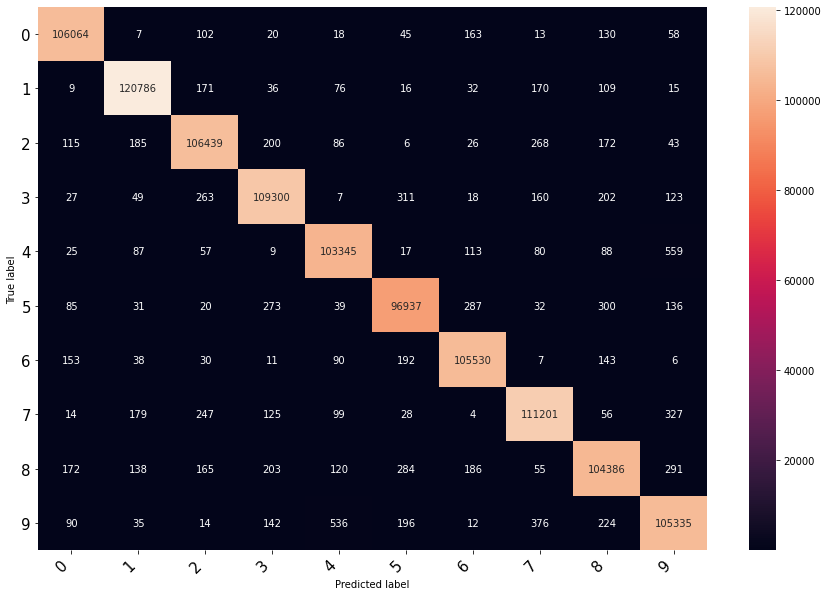

Epoch=  21 , batch =  0 , cost =  3.8778794078098144e-06 , accuracy =  1.0
Epoch=  21 , batch =  625 , cost =  1.7553025827510282e-05 , accuracy =  1.0
Epoch=  21 , batch =  1250 , cost =  0.020701473578810692 , accuracy =  1.0
Validate Epoch=  21 , batch =  0 , cost =  0.0008911903714761138 , accuracy =  1.0
Epoch:  21  averaged cost =  0.0032246746122837067  train accuracy =  0.9905548267885353


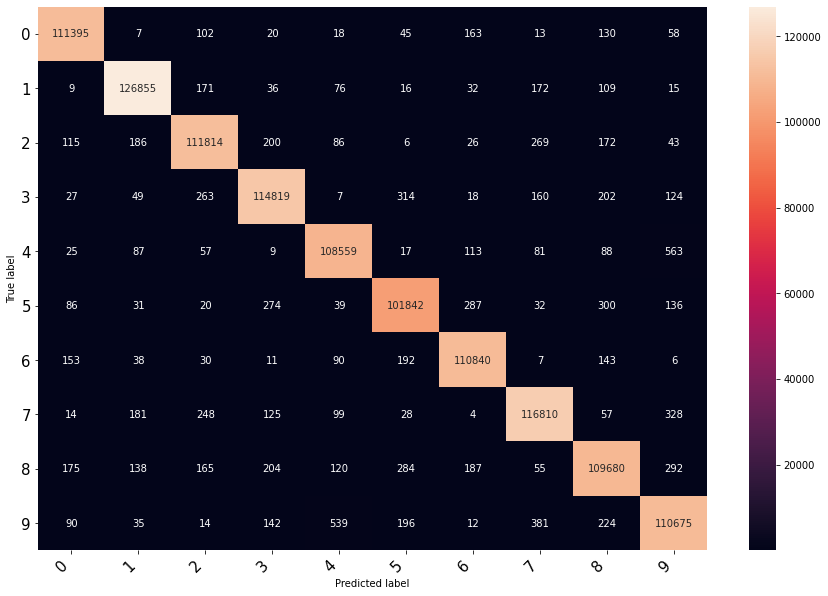

Epoch=  22 , batch =  0 , cost =  0.013906760141253471 , accuracy =  1.0
Epoch=  22 , batch =  625 , cost =  5.46160590602085e-05 , accuracy =  1.0
Epoch=  22 , batch =  1250 , cost =  0.010059697553515434 , accuracy =  1.0
Validate Epoch=  22 , batch =  0 , cost =  0.0001647648896323517 , accuracy =  1.0
Epoch:  22  averaged cost =  0.0031553595326840878  train accuracy =  0.9909563832938388


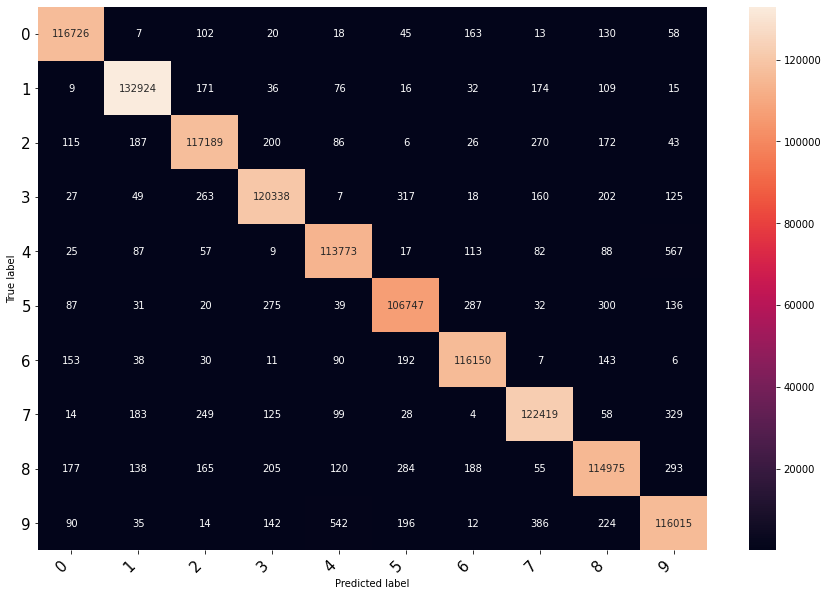

Epoch=  23 , batch =  0 , cost =  0.00014435626508202404 , accuracy =  1.0
Epoch=  23 , batch =  625 , cost =  9.35750431381166e-05 , accuracy =  1.0
Epoch=  23 , batch =  1250 , cost =  1.214424173667794e-06 , accuracy =  1.0
Validate Epoch=  23 , batch =  0 , cost =  1.1033374903490767e-05 , accuracy =  1.0
Epoch:  23  averaged cost =  0.0031145282555371523  train accuracy =  0.9913222169276736


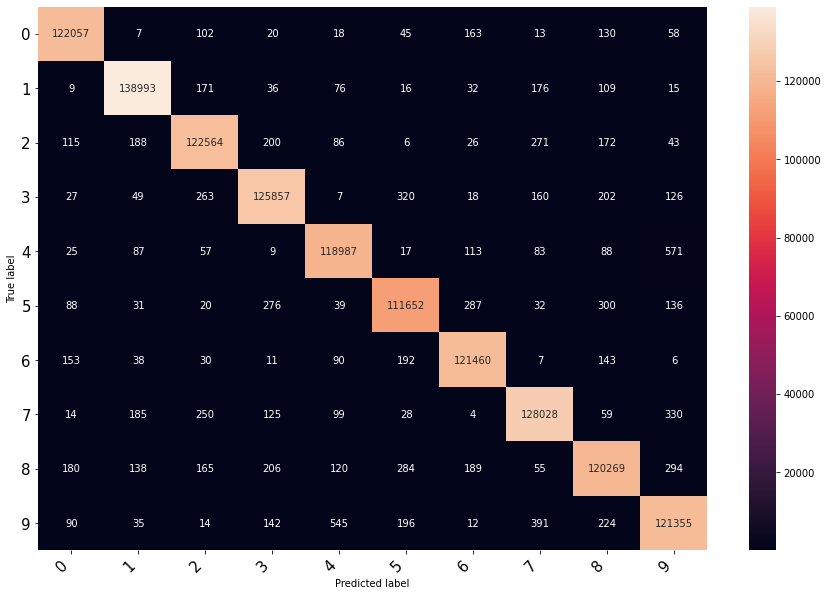

Epoch=  24 , batch =  0 , cost =  0.0007078797789290547 , accuracy =  1.0
Epoch=  24 , batch =  625 , cost =  0.03134215623140335 , accuracy =  0.96875
Epoch=  24 , batch =  1250 , cost =  0.00048334553139284253 , accuracy =  1.0
Validate Epoch=  24 , batch =  0 , cost =  4.567139967548428e-06 , accuracy =  1.0
Epoch:  24  averaged cost =  0.0030811557080596685  train accuracy =  0.9916591071781201


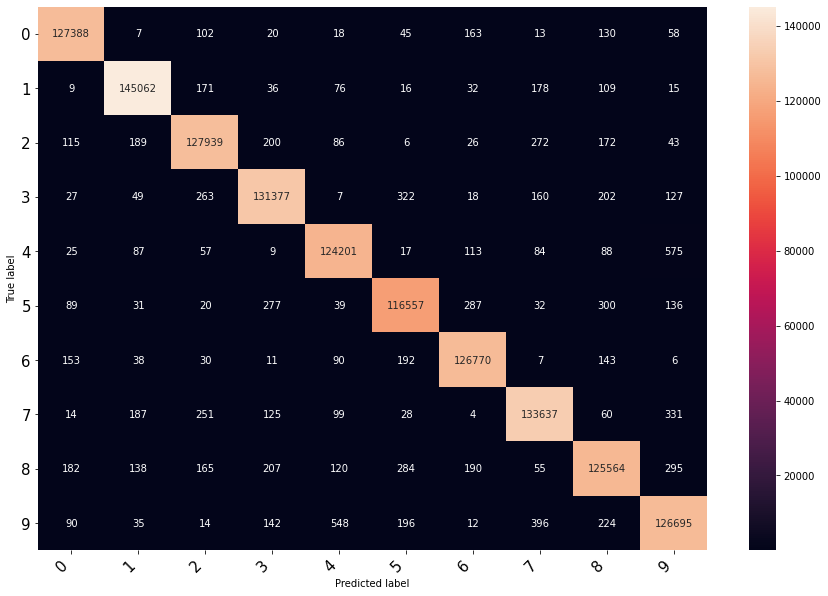

Epoch=  25 , batch =  0 , cost =  2.0475659766816534e-05 , accuracy =  1.0
Epoch=  25 , batch =  625 , cost =  9.31229442358017e-05 , accuracy =  1.0
Epoch=  25 , batch =  1250 , cost =  6.327160372165963e-05 , accuracy =  1.0
Validate Epoch=  25 , batch =  0 , cost =  2.9057233064122556e-07 , accuracy =  1.0
Epoch:  25  averaged cost =  0.003052587853744626  train accuracy =  0.9919697867298578


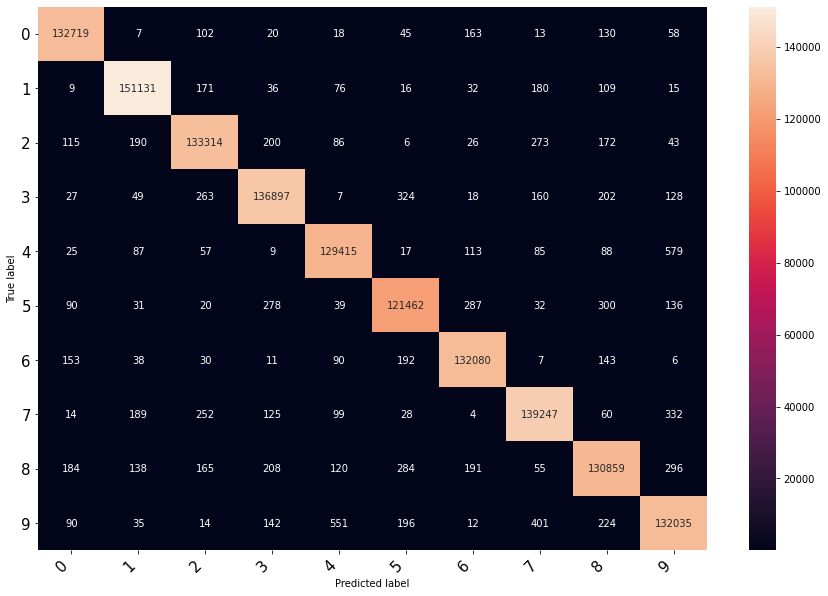

Epoch=  26 , batch =  0 , cost =  6.386726454365999e-05 , accuracy =  1.0
Epoch=  26 , batch =  625 , cost =  4.238163455738686e-05 , accuracy =  1.0
Epoch=  26 , batch =  1250 , cost =  0.002489818725734949 , accuracy =  1.0
Validate Epoch=  26 , batch =  0 , cost =  0.00289886724203825 , accuracy =  1.0
Epoch:  26  averaged cost =  0.0030274202581495047  train accuracy =  0.9922565678545389


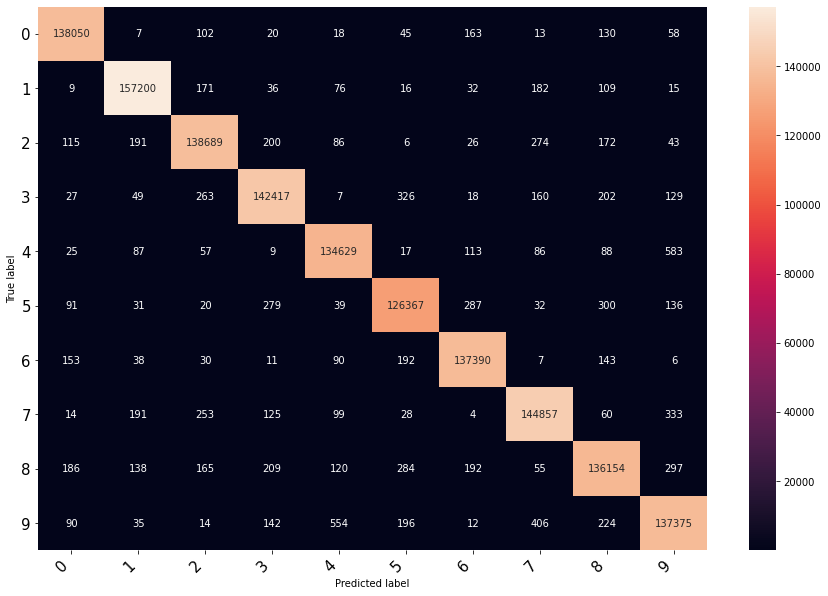

Epoch=  27 , batch =  0 , cost =  8.14456507214345e-05 , accuracy =  1.0
Epoch=  27 , batch =  625 , cost =  3.434018071857281e-05 , accuracy =  1.0
Epoch=  27 , batch =  1250 , cost =  0.0001244500163011253 , accuracy =  1.0
Validate Epoch=  27 , batch =  0 , cost =  0.000417862378526479 , accuracy =  1.0
Epoch:  27  averaged cost =  0.0029998780228197575  train accuracy =  0.9925221059329472


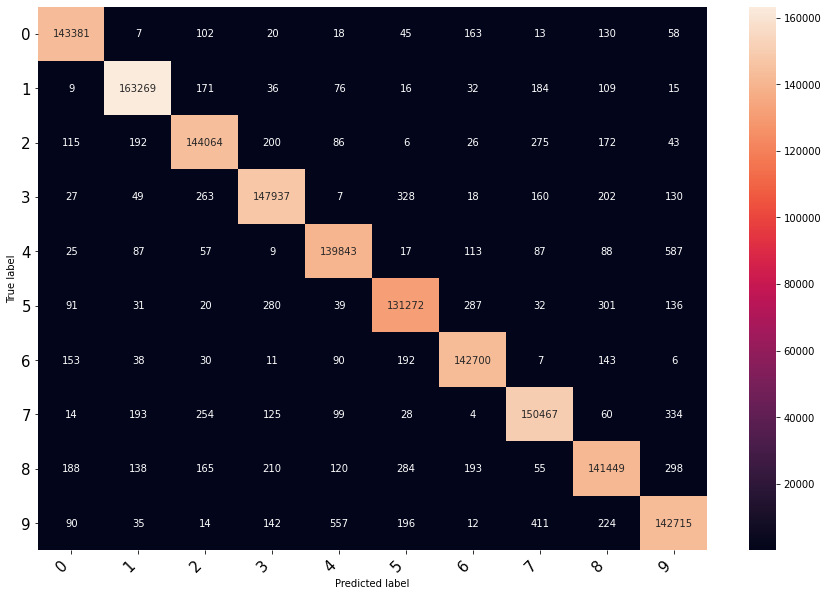

Epoch=  28 , batch =  0 , cost =  1.5161745068326127e-06 , accuracy =  1.0
Epoch=  28 , batch =  625 , cost =  0.002636222168803215 , accuracy =  1.0
Epoch=  28 , batch =  1250 , cost =  9.089776722248644e-05 , accuracy =  1.0
Validate Epoch=  28 , batch =  0 , cost =  0.00010302381997462362 , accuracy =  1.0
Epoch:  28  averaged cost =  0.0029738792218267918  train accuracy =  0.9927686770057549


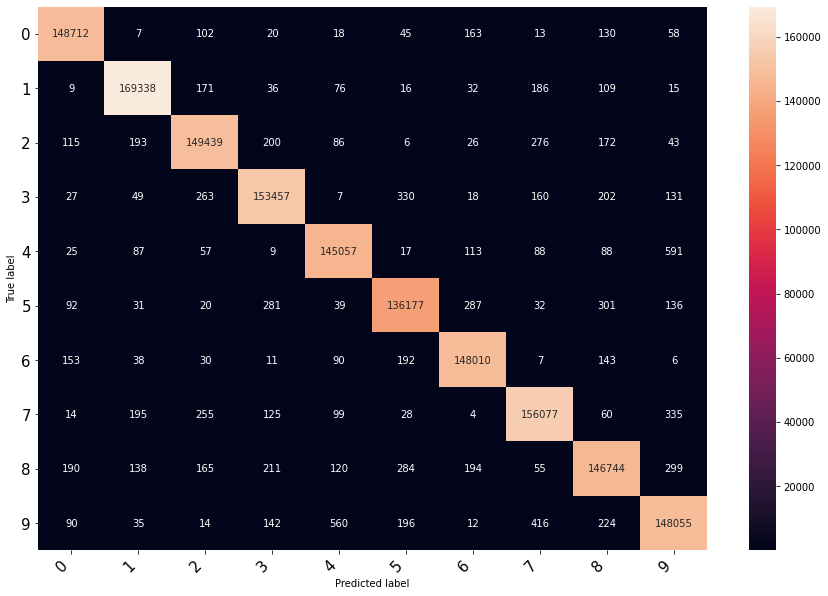

Epoch=  29 , batch =  0 , cost =  0.00036328035639598966 , accuracy =  1.0
Epoch=  29 , batch =  625 , cost =  7.231347262859344e-05 , accuracy =  1.0
Epoch=  29 , batch =  1250 , cost =  0.004377561621367931 , accuracy =  1.0
Validate Epoch=  29 , batch =  0 , cost =  0.00032858646591193974 , accuracy =  0.90625
Epoch:  29  averaged cost =  0.002949576359242201  train accuracy =  0.992998881557444


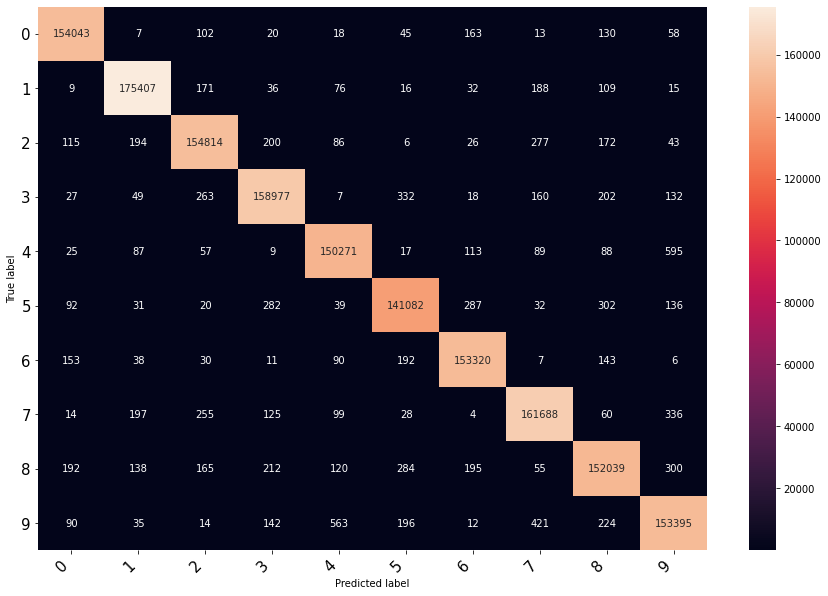

Epoch=  30 , batch =  0 , cost =  0.0006722341058775783 , accuracy =  1.0
Epoch=  30 , batch =  625 , cost =  0.0039582340978085995 , accuracy =  1.0
Epoch=  30 , batch =  1250 , cost =  5.2611394494306296e-05 , accuracy =  1.0
Validate Epoch=  30 , batch =  0 , cost =  0.0048942421562969685 , accuracy =  1.0
Epoch:  30  averaged cost =  0.0029258145950734615  train accuracy =  0.9932143562401263


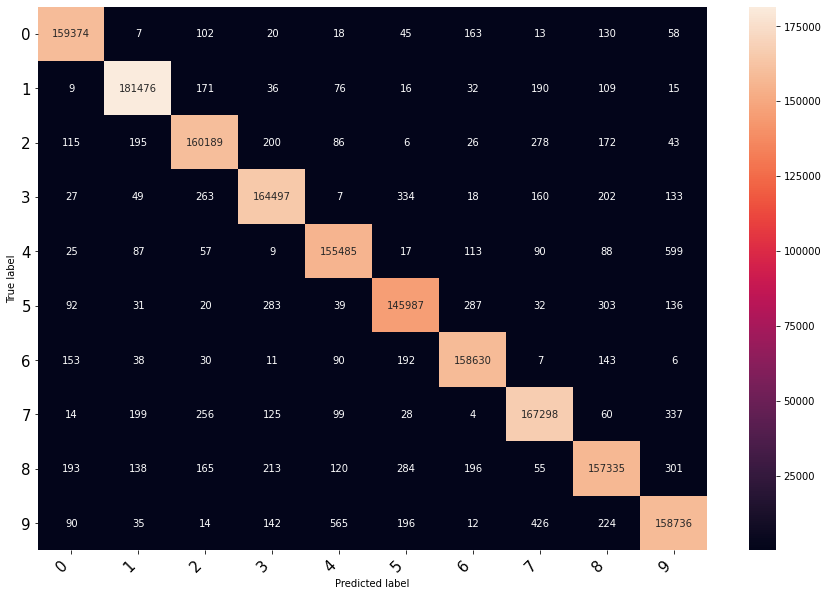

Epoch=  31 , batch =  0 , cost =  2.29222969210241e-05 , accuracy =  1.0
Epoch=  31 , batch =  625 , cost =  0.46750131249427795 , accuracy =  0.96875
Epoch=  31 , batch =  1250 , cost =  0.0018453445518389344 , accuracy =  1.0
Validate Epoch=  31 , batch =  0 , cost =  1.7194206520798616e-05 , accuracy =  1.0
Epoch:  31  averaged cost =  0.0028646597638726234  train accuracy =  0.9934159293303776


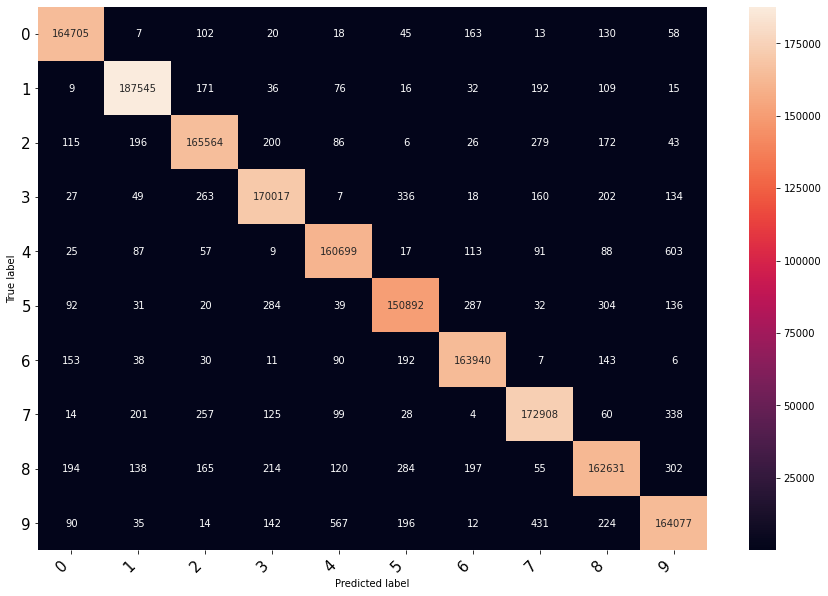

Epoch=  32 , batch =  0 , cost =  6.746163307980169e-06 , accuracy =  1.0
Epoch=  32 , batch =  625 , cost =  0.027328500524163246 , accuracy =  0.96875
Epoch=  32 , batch =  1250 , cost =  0.0005845637060701847 , accuracy =  1.0
Validate Epoch=  32 , batch =  0 , cost =  0.0003228560381103307 , accuracy =  1.0
Epoch:  32  averaged cost =  0.002862195484340191  train accuracy =  0.9936049041024881


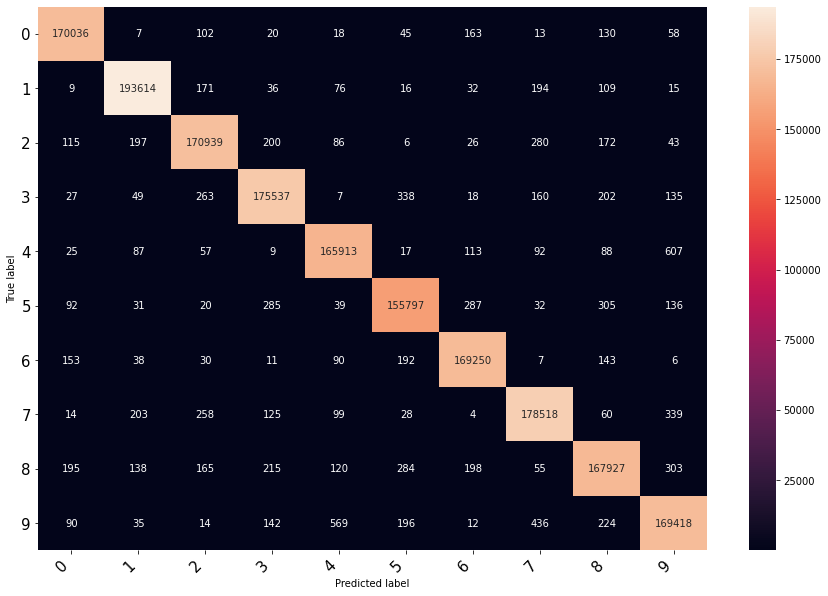

Epoch=  33 , batch =  0 , cost =  0.00036444910801947117 , accuracy =  1.0
Epoch=  33 , batch =  625 , cost =  2.7452962967799976e-05 , accuracy =  1.0
Epoch=  33 , batch =  1250 , cost =  0.00038152895285747945 , accuracy =  1.0
Validate Epoch=  33 , batch =  0 , cost =  2.9802318834981634e-08 , accuracy =  1.0
Epoch:  33  averaged cost =  0.002859672764316201  train accuracy =  0.9937824258581072


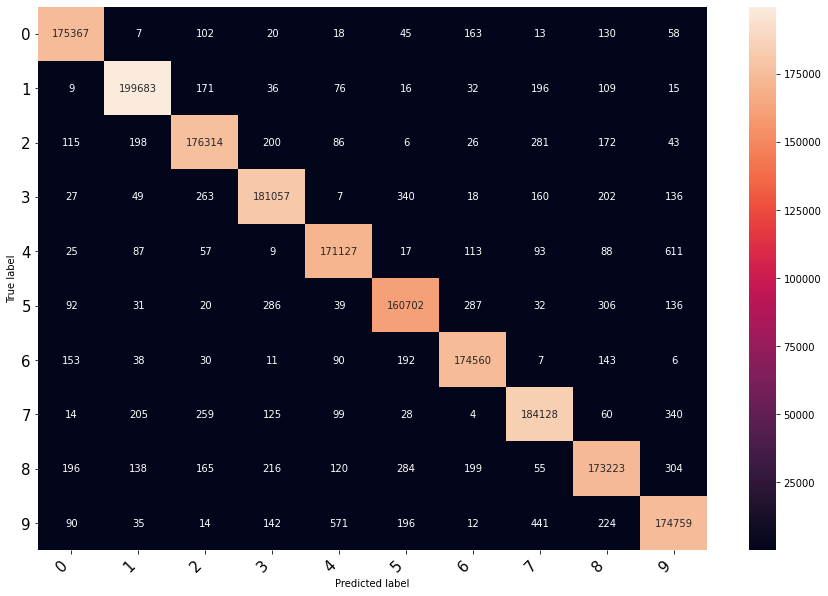

Epoch=  34 , batch =  0 , cost =  0.0017144461162388325 , accuracy =  1.0
Epoch=  34 , batch =  625 , cost =  7.073729648254812e-06 , accuracy =  1.0
Epoch=  34 , batch =  1250 , cost =  0.001729381736367941 , accuracy =  1.0
Validate Epoch=  34 , batch =  0 , cost =  0.00011203107715118676 , accuracy =  0.96875
Epoch:  34  averaged cost =  0.002857302548363805  train accuracy =  0.993950049658489


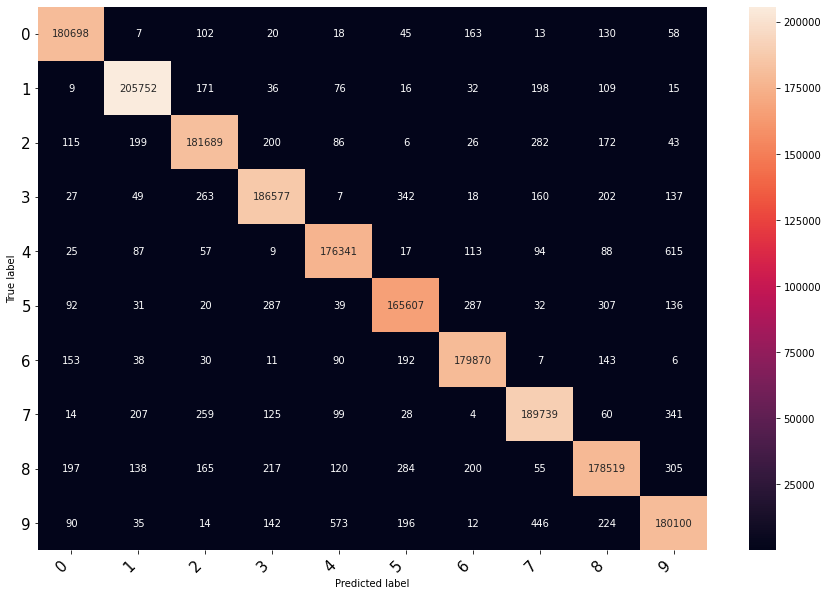

Epoch=  35 , batch =  0 , cost =  1.4913696759322193e-05 , accuracy =  1.0
Epoch=  35 , batch =  625 , cost =  0.0007437985041178763 , accuracy =  1.0
Epoch=  35 , batch =  1250 , cost =  2.6214209356112406e-05 , accuracy =  1.0
Validate Epoch=  35 , batch =  0 , cost =  6.2507260736310855e-06 , accuracy =  1.0
Epoch:  35  averaged cost =  0.002854851773008704  train accuracy =  0.9941080949559918


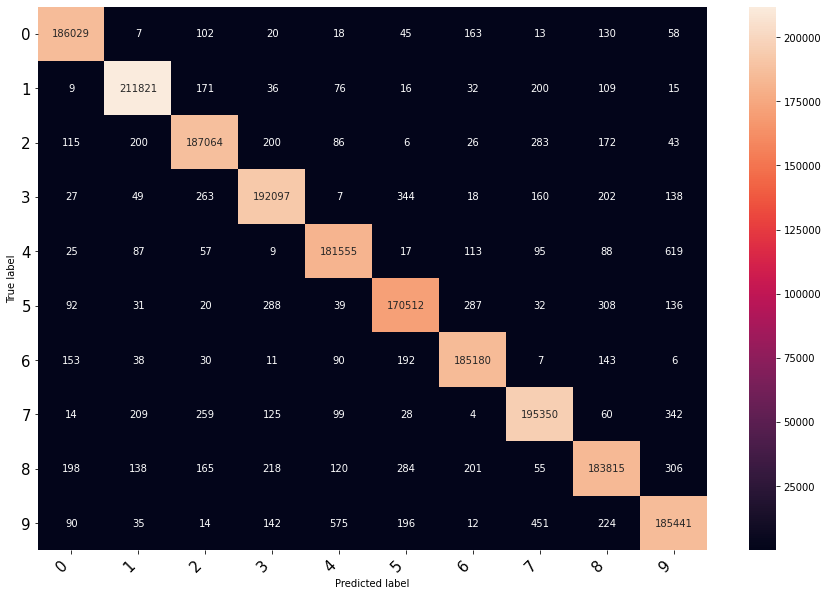

Epoch=  36 , batch =  0 , cost =  1.0027804819401354e-05 , accuracy =  1.0
Epoch=  36 , batch =  625 , cost =  6.97938958182931e-05 , accuracy =  1.0
Epoch=  36 , batch =  1250 , cost =  0.012781818397343159 , accuracy =  1.0
Validate Epoch=  36 , batch =  0 , cost =  0.00010050429409602657 , accuracy =  0.96875
Epoch:  36  averaged cost =  0.0028523511718958616  train accuracy =  0.9942573599591891


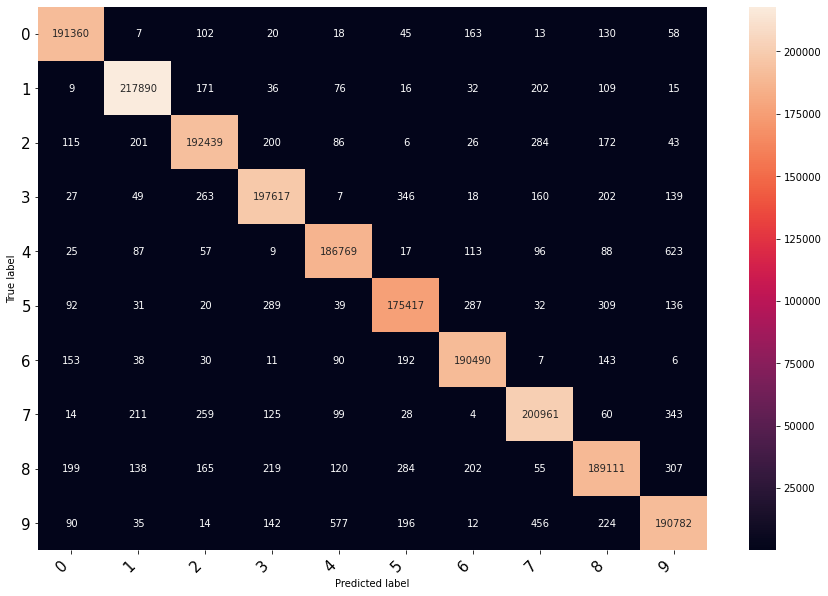

Epoch=  37 , batch =  0 , cost =  9.439185669180006e-05 , accuracy =  1.0
Epoch=  37 , batch =  625 , cost =  5.4752414143877104e-05 , accuracy =  1.0
Epoch=  37 , batch =  1250 , cost =  0.0007470895070582628 , accuracy =  1.0
Validate Epoch=  37 , batch =  0 , cost =  0.0002948657493107021 , accuracy =  0.9375
Epoch:  37  averaged cost =  0.0028500130865722895  train accuracy =  0.994398556583835


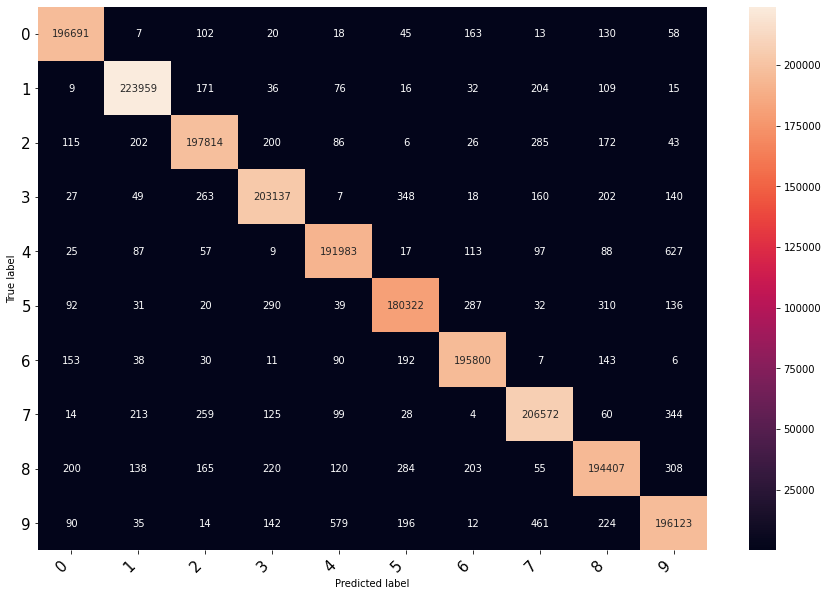

Epoch=  38 , batch =  0 , cost =  0.004997441079467535 , accuracy =  1.0
Epoch=  38 , batch =  625 , cost =  2.847142968676053e-05 , accuracy =  1.0
Epoch=  38 , batch =  1250 , cost =  0.011318125762045383 , accuracy =  1.0
Validate Epoch=  38 , batch =  0 , cost =  0.009803672321140766 , accuracy =  0.96875
Epoch:  38  averaged cost =  0.002850380726158619  train accuracy =  0.9945323218071839


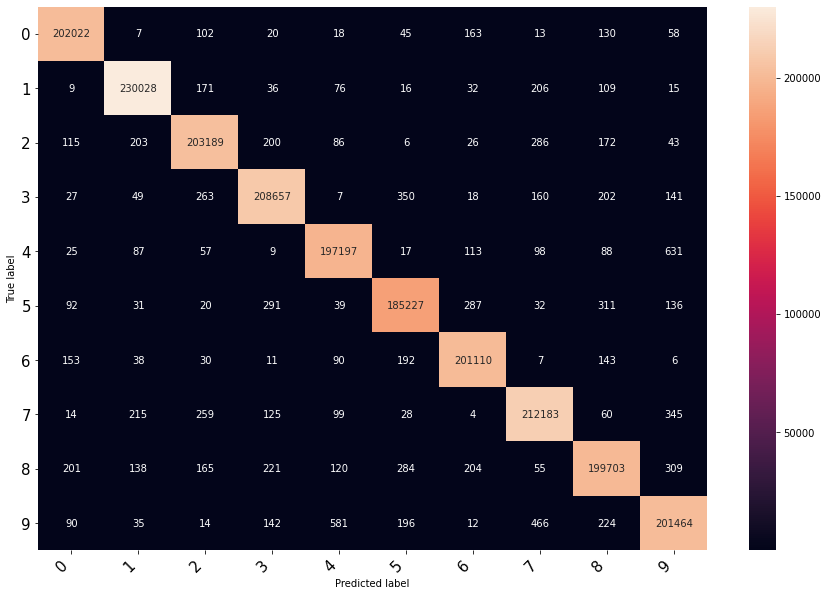

Epoch=  39 , batch =  0 , cost =  0.0006847277982160449 , accuracy =  1.0
Epoch=  39 , batch =  625 , cost =  1.9526218238752335e-05 , accuracy =  1.0
Epoch=  39 , batch =  1250 , cost =  0.00041763659100979567 , accuracy =  1.0
Validate Epoch=  39 , batch =  0 , cost =  0.0006280269590206444 , accuracy =  1.0
Epoch:  39  averaged cost =  0.0028455129358917475  train accuracy =  0.9946592272754892


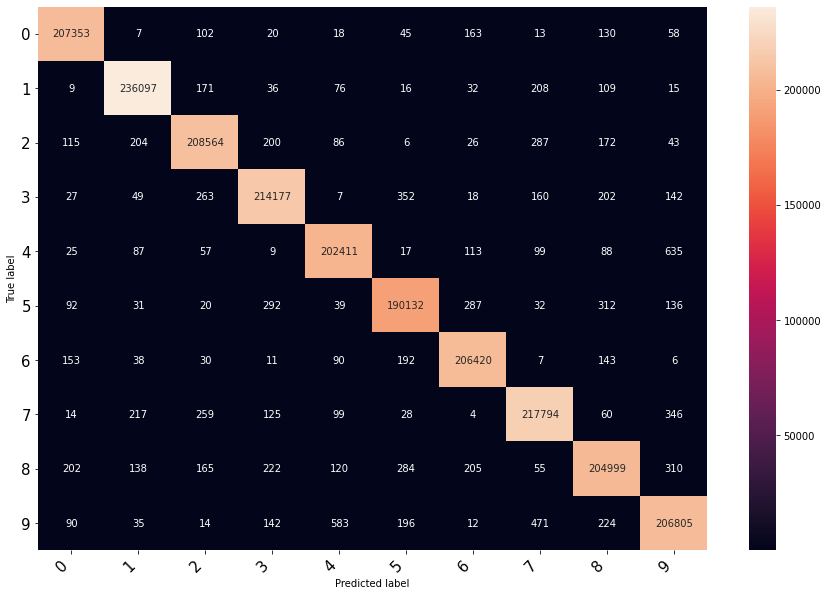

Epoch=  40 , batch =  0 , cost =  0.00015296315541490912 , accuracy =  1.0
Epoch=  40 , batch =  625 , cost =  0.000269843585556373 , accuracy =  1.0
Epoch=  40 , batch =  1250 , cost =  1.6202651750063524e-05 , accuracy =  1.0
Validate Epoch=  40 , batch =  0 , cost =  0.00025874661514535546 , accuracy =  1.0
Epoch:  40  averaged cost =  0.002842932939529419  train accuracy =  0.9947797874703791


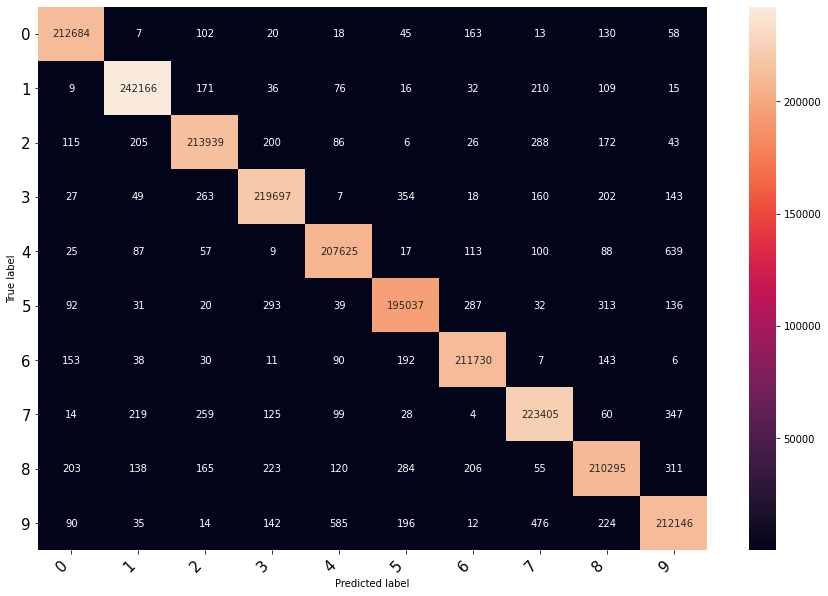

Epoch=  41 , batch =  0 , cost =  8.865307609084994e-05 , accuracy =  1.0
Epoch=  41 , batch =  625 , cost =  0.004187561105936766 , accuracy =  1.0
Epoch=  41 , batch =  1250 , cost =  0.010750346817076206 , accuracy =  1.0
Validate Epoch=  41 , batch =  0 , cost =  2.2276881281868555e-06 , accuracy =  0.96875
Epoch:  41  averaged cost =  0.0028366304468363523  train accuracy =  0.9948944666801526


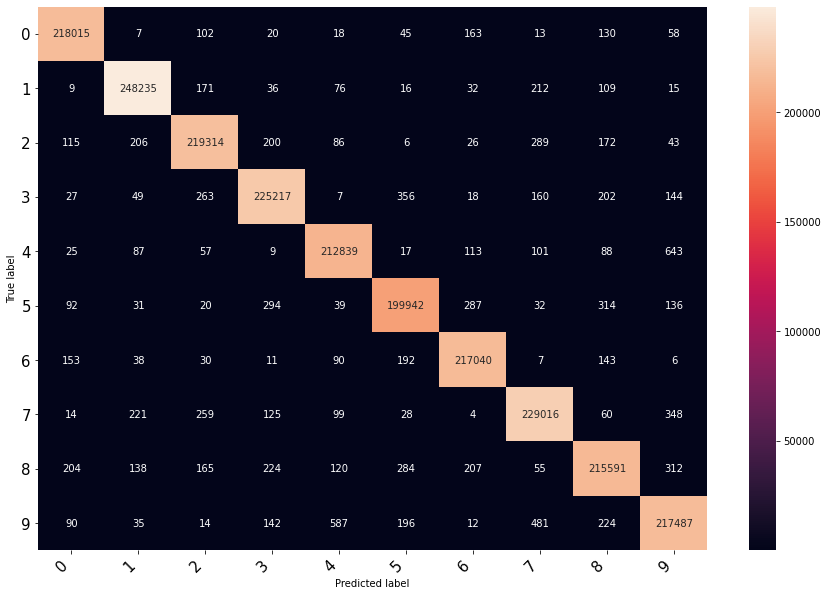

Epoch=  42 , batch =  0 , cost =  1.1822849955933634e-05 , accuracy =  1.0
Epoch=  42 , batch =  625 , cost =  0.01023912150412798 , accuracy =  1.0
Epoch=  42 , batch =  1250 , cost =  0.0011930548353120685 , accuracy =  1.0
Validate Epoch=  42 , batch =  0 , cost =  1.3030368791078217e-05 , accuracy =  1.0
Epoch:  42  averaged cost =  0.00283640343695879  train accuracy =  0.9950036849751749


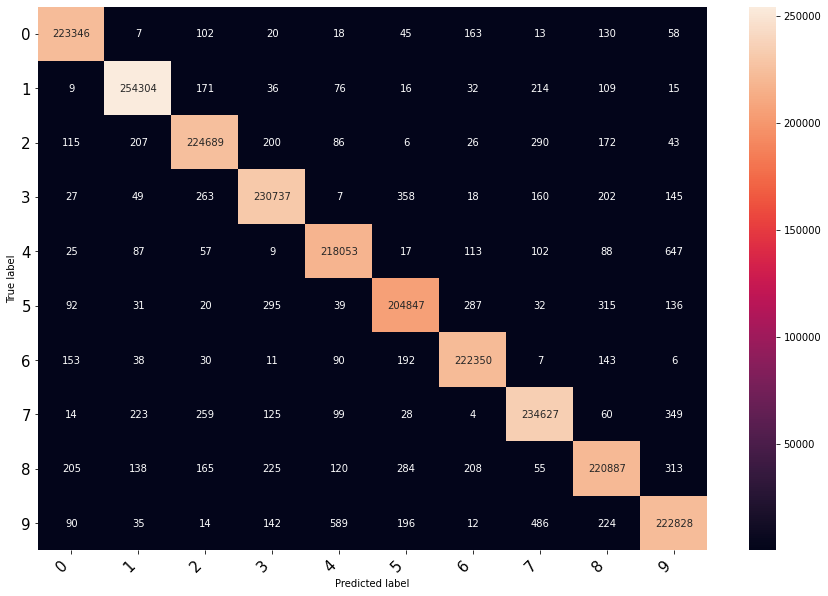

Epoch=  43 , batch =  0 , cost =  0.0001148586452472955 , accuracy =  1.0
Epoch=  43 , batch =  625 , cost =  0.07501289993524551 , accuracy =  0.96875
Epoch=  43 , batch =  1250 , cost =  0.005786013323813677 , accuracy =  1.0
Validate Epoch=  43 , batch =  0 , cost =  0.0001582615077495575 , accuracy =  1.0
Epoch:  43  averaged cost =  0.0028362595476210117  train accuracy =  0.9951078233494985


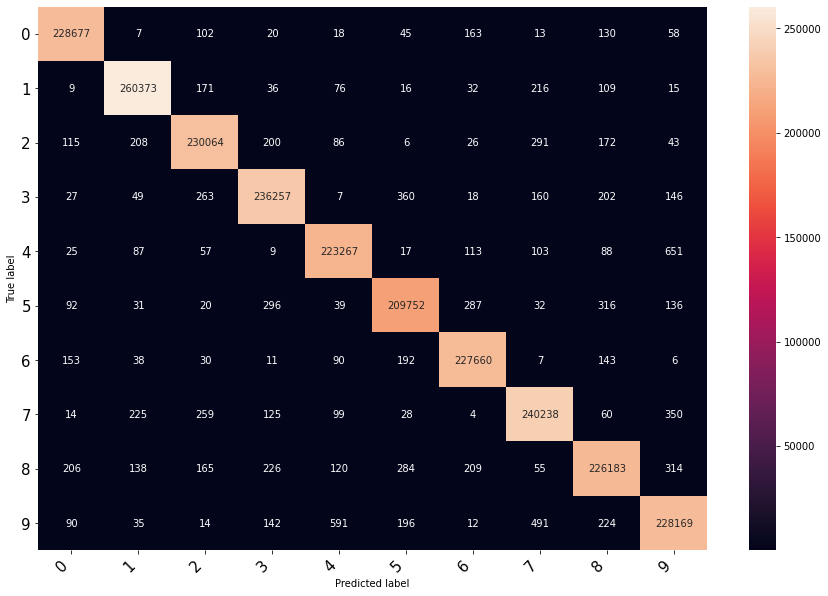

Epoch=  44 , batch =  0 , cost =  0.006465936079621315 , accuracy =  1.0
Epoch=  44 , batch =  625 , cost =  0.0011030657915398479 , accuracy =  1.0
Epoch=  44 , batch =  1250 , cost =  0.005668348632752895 , accuracy =  1.0
Validate Epoch=  44 , batch =  0 , cost =  8.493627206007659e-07 , accuracy =  1.0
Epoch:  44  averaged cost =  0.0028359745629131794  train accuracy =  0.9952072281613529


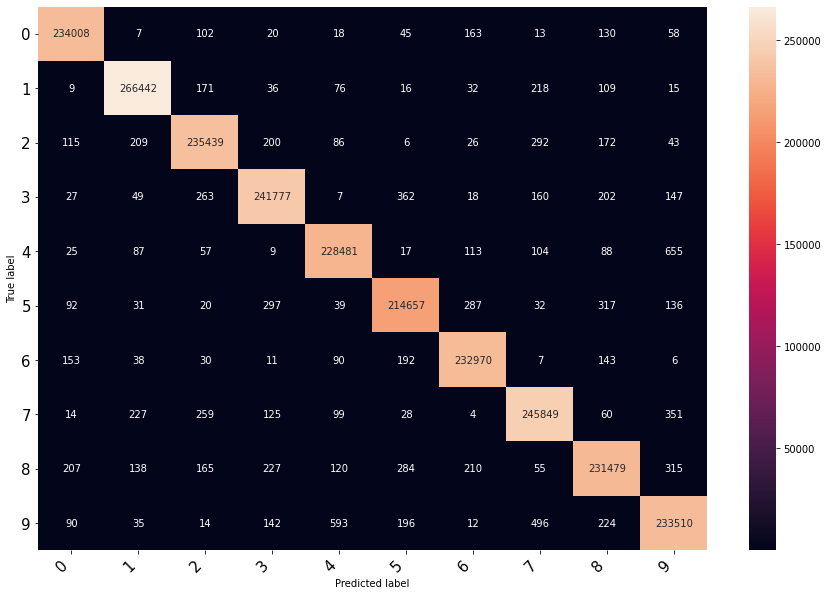

Epoch=  45 , batch =  0 , cost =  0.00011193836689926684 , accuracy =  1.0
Epoch=  45 , batch =  625 , cost =  0.0024050623178482056 , accuracy =  1.0
Epoch=  45 , batch =  1250 , cost =  3.762667256523855e-05 , accuracy =  1.0
Validate Epoch=  45 , batch =  0 , cost =  4.00833050662186e-06 , accuracy =  0.96875
Epoch:  45  averaged cost =  0.0028357466217130423  train accuracy =  0.9953022149815692


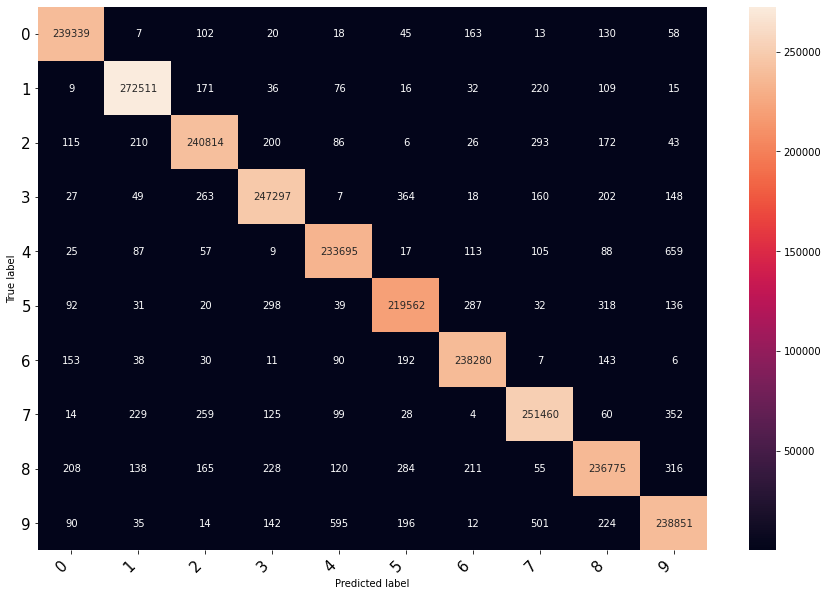

Epoch=  46 , batch =  0 , cost =  0.004119832068681717 , accuracy =  1.0
Epoch=  46 , batch =  625 , cost =  0.001226157764904201 , accuracy =  1.0
Epoch=  46 , batch =  1250 , cost =  6.117298471508548e-05 , accuracy =  1.0
Validate Epoch=  46 , batch =  0 , cost =  0.021793311461806297 , accuracy =  1.0
Epoch:  46  averaged cost =  0.0028419774025678635  train accuracy =  0.9953930719400371


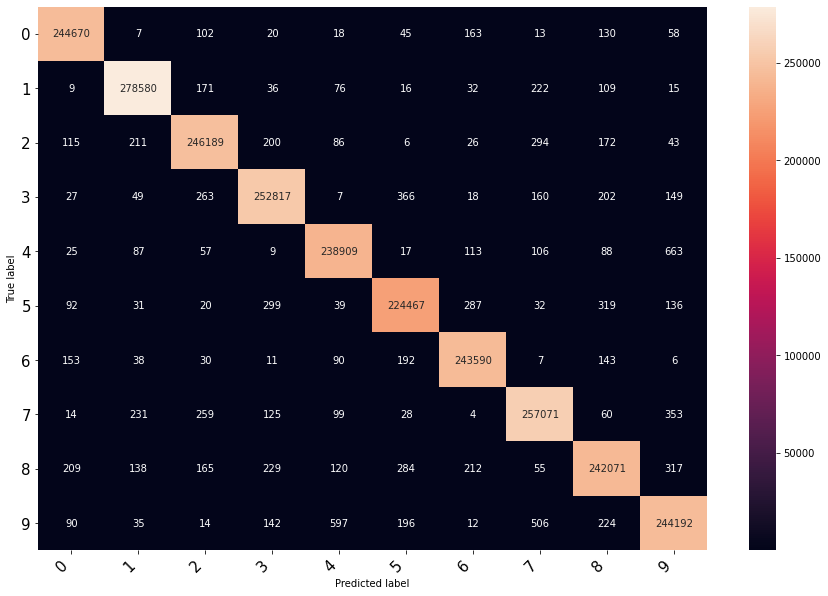

Epoch=  47 , batch =  0 , cost =  9.532343392493203e-05 , accuracy =  1.0
Epoch=  47 , batch =  625 , cost =  0.00022283295402303338 , accuracy =  1.0
Epoch=  47 , batch =  1250 , cost =  0.0002972102374769747 , accuracy =  1.0
Validate Epoch=  47 , batch =  0 , cost =  1.0654282505129231e-06 , accuracy =  1.0
Epoch:  47  averaged cost =  0.0028353040106594563  train accuracy =  0.9954800626449531


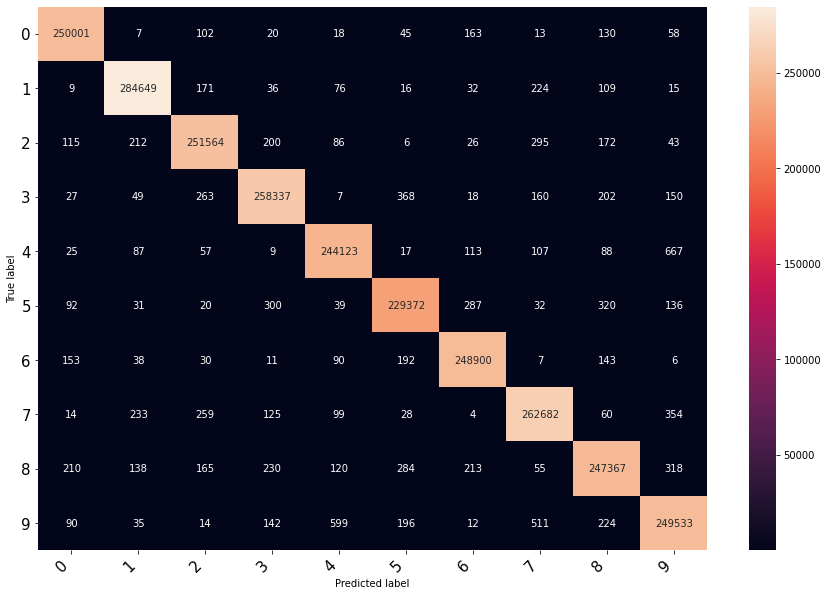

Epoch=  48 , batch =  0 , cost =  0.0012294501066207886 , accuracy =  1.0
Epoch=  48 , batch =  625 , cost =  3.1366496841656044e-05 , accuracy =  1.0
Epoch=  48 , batch =  1250 , cost =  0.0028578266501426697 , accuracy =  1.0
Validate Epoch=  48 , batch =  0 , cost =  0.00043900232412852347 , accuracy =  1.0
Epoch:  48  averaged cost =  0.0028351908549666405  train accuracy =  0.9955634287371643


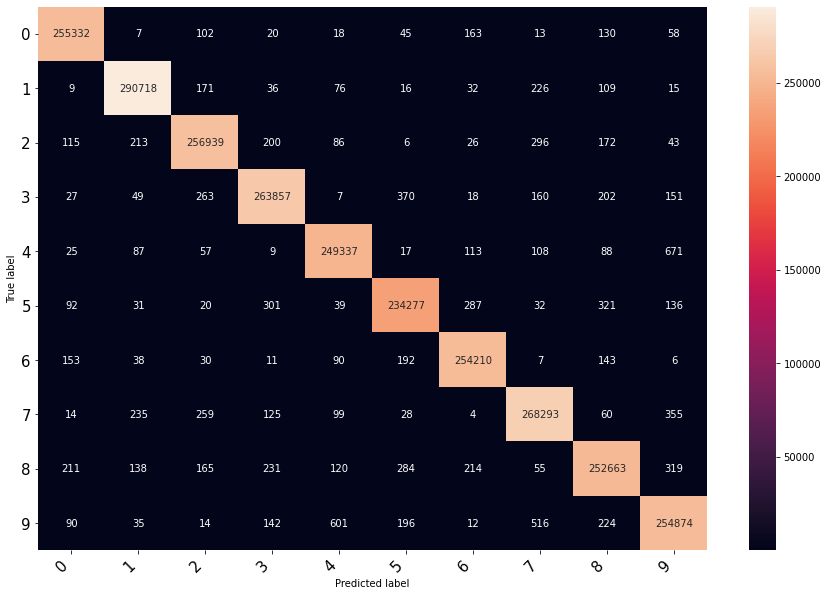

Epoch=  49 , batch =  0 , cost =  0.0026705064810812473 , accuracy =  1.0
Epoch=  49 , batch =  625 , cost =  2.9802317058624794e-08 , accuracy =  1.0
Epoch=  49 , batch =  1250 , cost =  0.0005105671007186174 , accuracy =  1.0
Validate Epoch=  49 , batch =  0 , cost =  1.7394697351846844e-05 , accuracy =  0.96875
Epoch:  49  averaged cost =  0.00283487094566226  train accuracy =  0.9956433921317343


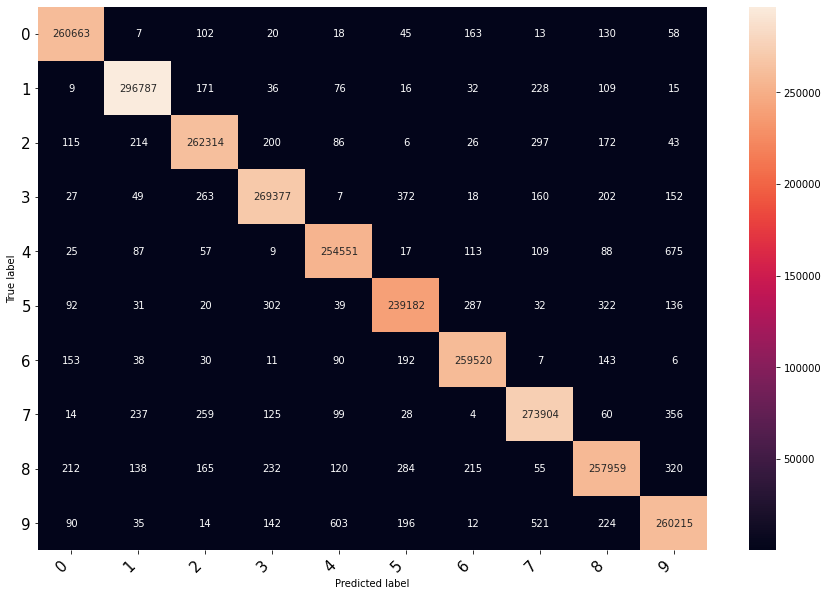

Epoch=  50 , batch =  0 , cost =  0.00040968795656226575 , accuracy =  1.0
Epoch=  50 , batch =  625 , cost =  9.586926898919046e-05 , accuracy =  1.0
Epoch=  50 , batch =  1250 , cost =  0.0003098980232607573 , accuracy =  1.0
Validate Epoch=  50 , batch =  0 , cost =  0.011375708505511284 , accuracy =  1.0
Epoch:  50  averaged cost =  0.0028380095027387142  train accuracy =  0.9957201569905213


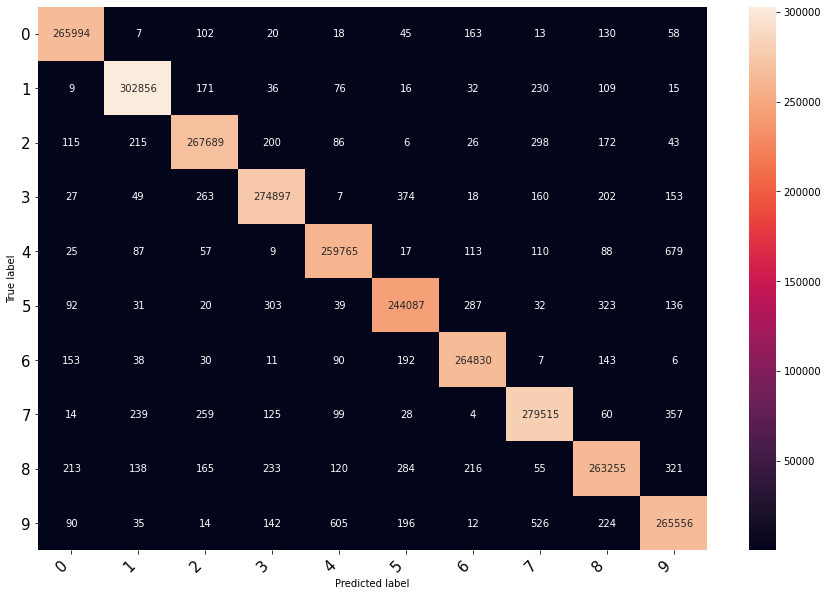

Learning Finished!
 averaged cost =  0.014908722741529346  train accuracy =  98.81928513834463


In [27]:
print('Training the Deep Learning network ...')
train_cost = []
train_accuracy = []
#accuracy_total_train= []
total_avg_cost=[]
total_avg_accuracy=[]
validate_cost=[]
validate_accuracy=[]
total_validate_cost=[]
total_validate_accuracy=[]
avgv=0
training_epochs = 50
total_batch = len(train) // batch_size
print("total_batch ", total_batch)

#print('Size of the training dataset is ',train.data.size())
print('Size of the testing dataset ',test.data.size())
print('Batch size is : ',batch_size)
print('Total number of batches is : ',total_batch)
print('Total number of epochs is :',training_epochs)
confusion_matrix = torch.zeros(10,10)
for epoch in range(training_epochs):
    avg = 0
    
    for i, (batch_X, batch_Y) in enumerate(train_loader):
        X = Variable(batch_X)    
        Y = Variable(batch_Y)    

        optimizer.zero_grad() 
        
        hypothesis = model(X)
        _, preds = torch.max(hypothesis, 1)
        for t, p in zip(Y.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1
        cost = criterion(hypothesis, Y) 
        
        
        cost.backward()   
        optimizer.step() 
             
        
        prediction = hypothesis.data.max(dim=1)[1]
        #print(prediction)
        train_accuracy.append(((prediction.data == Y.data).float().mean()).item())
        train_cost.append(cost.item())   
        if i % 625 == 0:
            #print(prediction)
            print("Epoch= ",epoch+1,", batch = ",i,", cost = ",train_cost[-1],", accuracy = ",train_accuracy[-1])
       
        avg += cost.data / total_batch

    #Testing the Validation Set
    model.eval()    
    for i, (batch_X, batch_Y) in enumerate(validation_loader):
        X = Variable(batch_X)    
        Y = Variable(batch_Y)
        prediction=model(X)
        validate_cost.append(cost.item())
        validate_prediction = (torch.max(prediction.data, dim=1)[1] == Y.data)
        validate_accuracy.append(validate_prediction.float().mean().item()) 
        if i % 625 == 0:
                print("Validate Epoch= ",epoch+1,", batch = ",i,", cost = ",validate_cost[-1],", accuracy = ",validate_accuracy[-1])
        avgv+=cost.data/total_batch
    
    scheduler.step()
    print("Epoch: ",epoch+1," averaged cost = ",avg.tolist()," train accuracy = ",sum(train_accuracy)/len(train_accuracy))
    total_avg_cost.append(avg.tolist())
    total_avg_accuracy.append(sum(train_accuracy)/len(train_accuracy))
    total_validate_cost.append(avgv.tolist())
    total_validate_accuracy.append(sum(validate_accuracy)/len(validate_accuracy))

    #Displaying Confusing Matrix in form of Heatmap.
    plt.figure(figsize=(15,10))

    class_names = ["0","1","2","3","4","5","6","7","8","9"]
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
        

print('Learning Finished!')
print(" averaged cost = ",sum(total_avg_cost)/len(total_avg_cost)," train accuracy = ",(sum(total_avg_accuracy)/len(total_avg_accuracy))*100)

Accuracy Curves


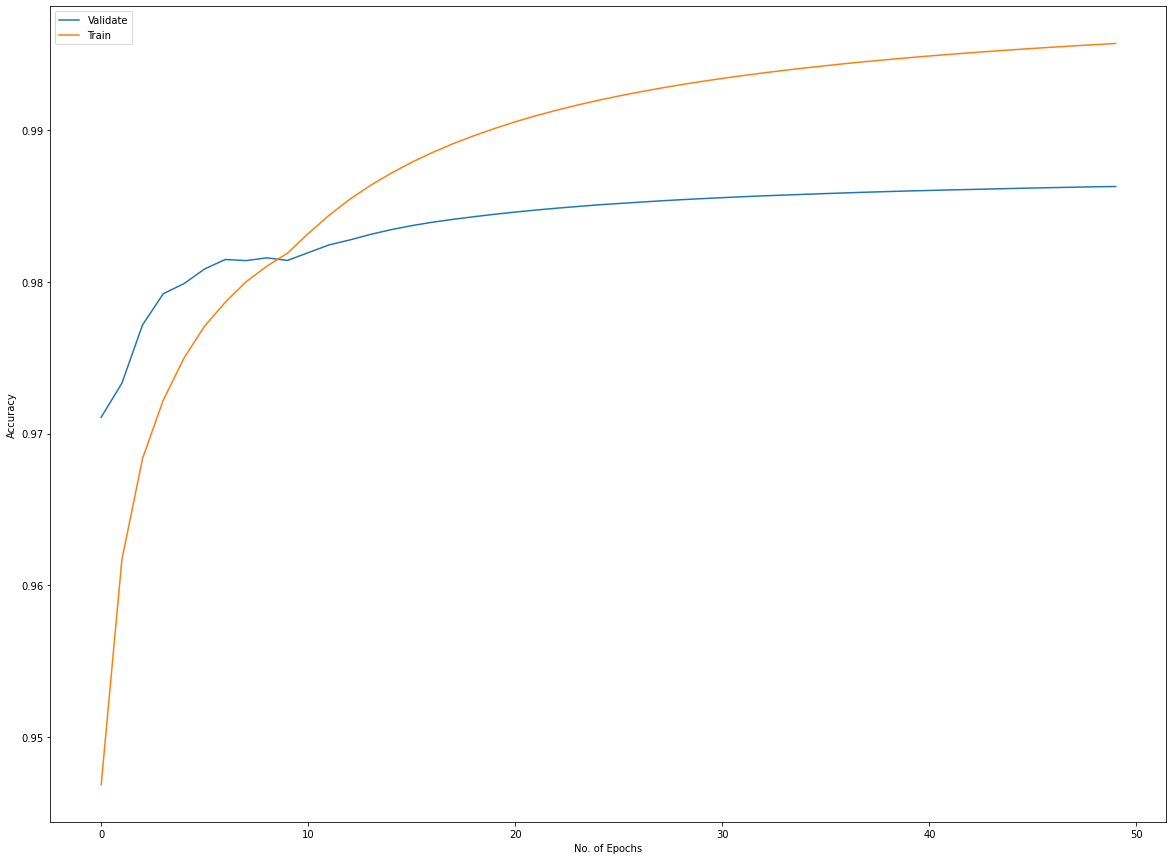

In [28]:
#Displaying Accuracy Curves
print("Accuracy Curves")
plt.figure(figsize=(20,15))
plt.plot(total_validate_accuracy,label="Validate")
plt.plot(total_avg_accuracy,label="Train")
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [29]:
# From the above accuracy graphs you can see that as the model is being trained the accuracy is increasing. Similarly for the validation the accuray increases as the epochs increases.
#So, the graph reasonably fits.

Loss Curves


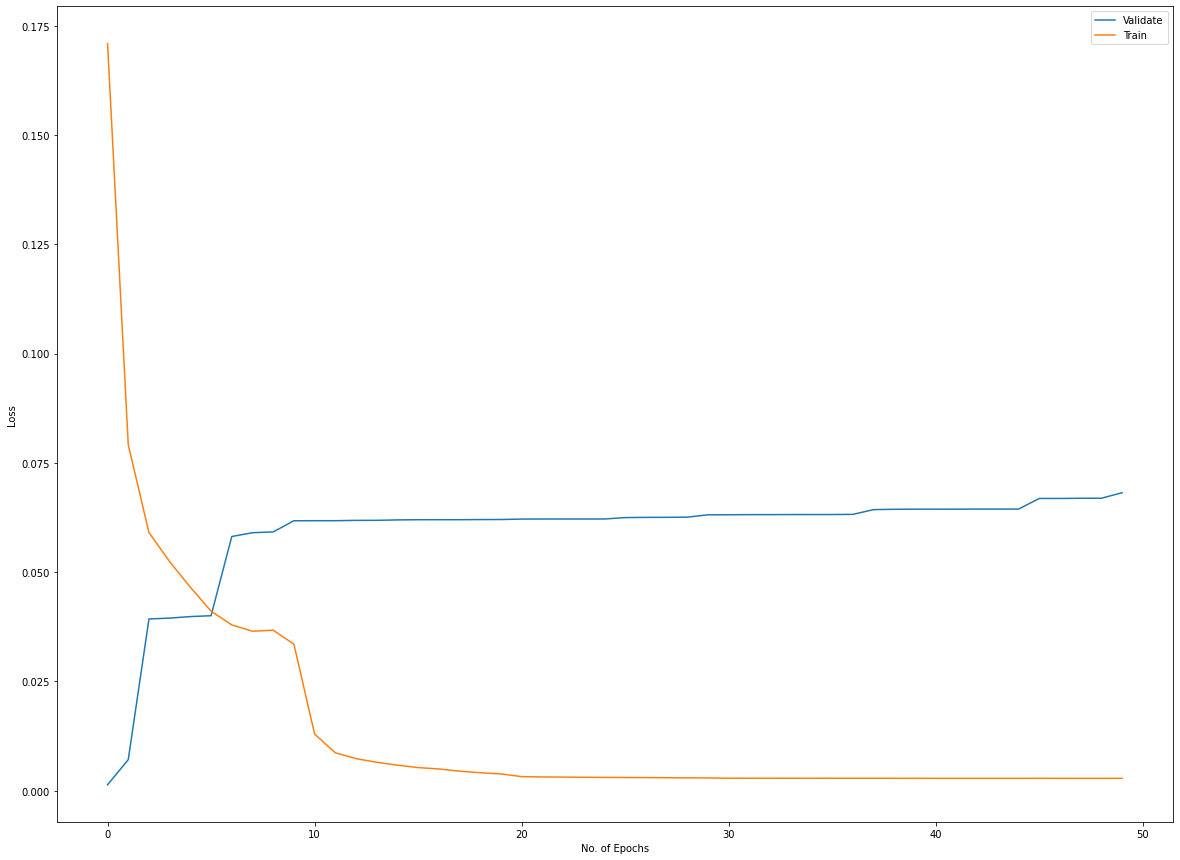

In [30]:
#Displaying Loss Curves
print("Loss Curves")
plt.figure(figsize=(20,15))
plt.plot(total_validate_cost,label="Validate")
plt.plot(total_avg_cost,label="Train")
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
#From the above loss graph, we  can see that the as the model is training the cost gradually decreases. The cost for validation is slightly increasing as the epochs increasse.
# So, the graph reasonably fits.

Testing the Deep Learning network ...


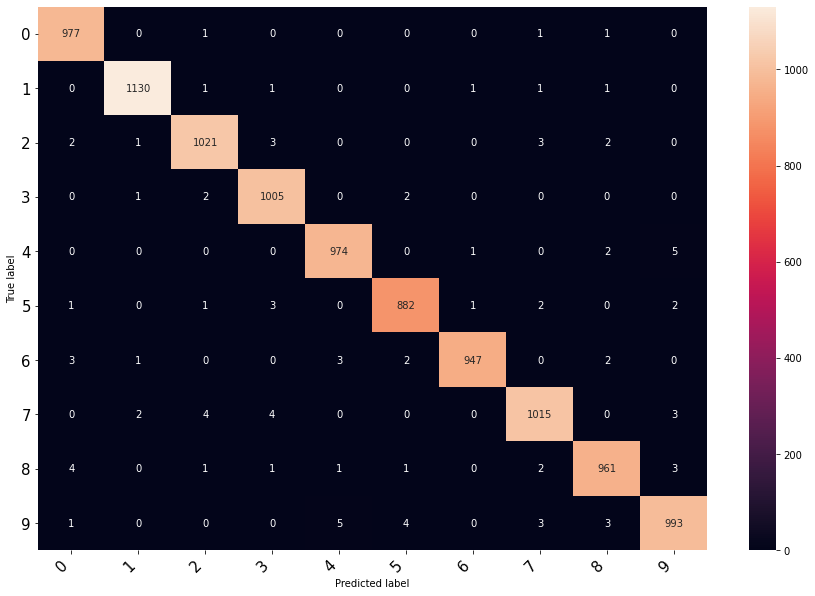

Accuracy is 99.05151757188499


In [32]:
print('Testing the Deep Learning network ...')
model.eval()
accuracy=0
acc=[]
confusion_matrix1 = torch.zeros(10,10)
for i,(batch_X,batch_Y) in enumerate(test_loader):
    X = Variable(batch_X)    
    Y = Variable(batch_Y)
    prediction=model(X)
    _, preds = torch.max(prediction, 1)
    for t, p in zip(Y.view(-1), preds.view(-1)):
            confusion_matrix1[t.long(), p.long()] += 1
    correct_prediction = (torch.max(prediction.data, dim=1)[1] == Y.data)
    accuracy = correct_prediction.float().mean().item()
    acc.append(accuracy)
plt.figure(figsize=(15,10))

class_names = ["0","1","2","3","4","5","6","7","8","9"]
df_cm = pd.DataFrame(confusion_matrix1, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print("Accuracy is", (sum(acc)/len(acc))*100)
    

REFERENCES:-

https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html

This Notebook is contituation of baseline.ipynb. 
In this Notebook we have applied Batch Normalisation.
For Batch Normalisation we have used a pytorch library "BatchNorm2d".

The Accuracy is:-99.05%